<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/projects/2021_1/team_work_responses_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM WORK - CONTROLE DE PROCESSOS QUÍMICOS

## Identificação

### TEAM 1
<!---
Change X for the letter of your team.
-->
### MEMBROS
<!---
List the team members and their e-mails
-->
Larissa Silva Martins   
Rebeca Agra Aquino   
Thaísa Cristina Santos Lopes


## Atividade 1

**Com base no modelo atribuído à sua equipe, insira células de texto (incluindo texto, imagens, tabelas, equações, ...) para descrevê-lo. Tome cuidado com esta descrição e torne-a o mais completa possível.**   

**1.1 DESCRIÇÃO DO PROCESSO** 

Modelos de reatores envolvendo uma cinética complexa são de interesse comercial, uma vez que eles consistem na previsão do comportamento não linear de reatores de polimerização. Sendo assim, projetos de controladores multivariáveis são triviais para realizar o processo.
No presente trabalho em desenvolvimento, um reator de polietileno em fase gasosa foi considerado, conforme ilustrado na Figura 1. O processo consiste em um reator de leito fluidizado alimentado por etileno, comonômeros, hidrogênio e substâncias inertes, que fornecem a fluidização e meios de transferência de calor e reagentes para o crescimento das partículas de polímero.  Um catalisador ZN heterogêneo e um cocatalisador de alquil alumínio são inseridos continuamente ao reator ao longo do processo. As partículas fluidizadas se desprendem do gás reagente na seção superior expandida do reator e os gases que não reagiram inicialmente são reciclados para a base do reator. A reação de polimerização do processo é altamente exotérmica e, por isso, o calor deve ser removido do gás do ciclo antes de retornar ao reator. Quando a válvula de descarga é aberta, o produto fluidizado é levado para um tanque de compensação, onde o gás que não reagiu é separado do produto e, por fim, o produto puro segue para a área de incorporação de aditivos e pelotização. Como a alimentação do reator ocorre continuamente, para evitar acúmulo de impurezas dentro do reator, utiliza-se uma porção do gás recuperado ou uma pequena corrente de ventilação é removida para a limpeza. 

Neste trabalho será observado o efeito de uma perturbação do tipo degrau na temperatura do reator em malha aberta e depois será inserido um controle para observar o comportamento da malha perturbada sendo controlada ao se manipular a vazão de alimentação.

$\phantom{distance} Figura \quad 1 - Esquema \quad do \quad sistema \quad de \quad reator \quad de \quad polietileno \quad de \quad fase \quad gasosa. $
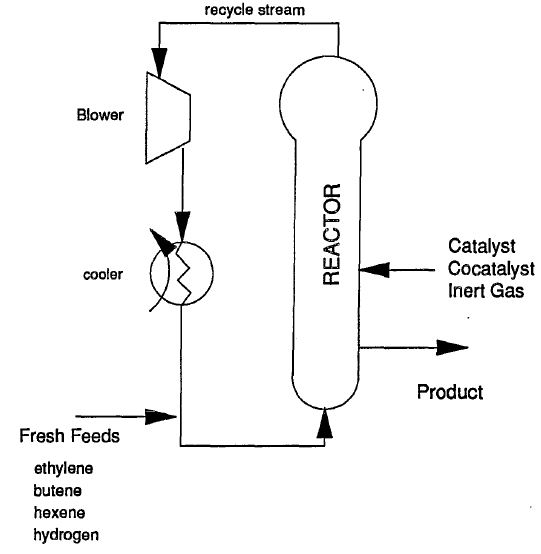

**1.2 MODELO MATEMÁTICO** 

$\phantom{distance} Tabela \space 1 - Equações \space do \space modelo \space do \space reator \space de \space polietileno \space de \space fase \space gasosa \space industrial.  $

|          |                                               | |
| :------- |:--------------------------------------------- | |
|Balanço de massa em inertes | $$  V_g \frac{d[In]}{dt} = \varGamma_{In} - \frac{[In]}{[M_l] + [In]} b_t$$ | |
|Balanço de massa em monômeros | $$ V_g \frac{d[M_l]}{dt} = \varGamma_{M_l} - \frac{[M_l]}{[M_l] + [In]} b_t - R_{M_l} $$ | |
|Balanço dos sítios ativos do catalisador | $$ \frac{dY_i}{dt} = \varGamma_{Y_i} - k_di Y_i - \frac{O}{R}  $$ | |
|Balanço de energia do reator | $$ (M_I C_{pt} + B_w C_{ppol}) \frac{dT}{dt} = H_f + H_{gl} - H_{go} - H_I  - O_p C_{ppol}(T - T_f) $$ | |
|Erro integral do controlador de pressão parcial para o etileno | $$ \frac{I_E}{dt} = P_{sp} - [M_l]RT $$ | |
|Controlador de pressão parcial do etileno | $$  \varGamma_{M_l} = B_l + K_p (P_{sp} - [M_l]RT + \frac{1}{\tau_l} I_E)$$ | |

$\phantom{distance} Tabela \space 2 - Equações \space algébricas \space para \space o \space modelo \space do \space reator.$

| Equações                                | Restrições ||
| :------------------------------------- |:--------------- ||
| $$ b_t = v_p C_v \sqrt{([M_1] + [ln])RT-P_v} $$ |$$b_t \eqslantgtr 0 $$  ||
| $$ k_{pi} = k_{po} \space exp [{\frac {E_a}{R}}(\frac{1}{T} - \frac{1}{T_f})]  $$ | $i=1,2$ ||
| $$ R_{M1} = [M_1](k_{pi}Y_1 + k_{p2}Y_2)$$| ||
| $$ O_p = R_{M1}M_{w1} $$|  ||
| $$ C_{pg} = \frac {[M_1]}{[M_1]+[In]} C_{pm1} + \frac {In}{[M_1]+[In]}C_{pIn}$$  |||
| $$H_f = \varGamma_{M1} C_{pm_1}(T_{feed} - T_f) $$ |||
| $$ H_{g0} = (F_g + b_1) C_{pg}(T-T_f) $$ |||
| $$ H_{g1} = F_gC_{pg}(T_{gi}-T_f)  $$ |||
| $$ H_{T} = H_{reac}M_{w1}R_{M1} $$|||

**1.3 DADOS DO PROBLEMA:** [Referência](https://www.sciencedirect.com/science/article/pii/S0959152496000169)

$\phantom{distance} Tabela \space 3 - Valores \space e \space unidades \space dos \space parâmetros    $


| Parametros | Valor | Unidade | |
| :------- | :----: | :------- | |
| $a_c$  | 0.548 | mol/kg | |
| AU | 1.14x 10<sup>6</sup> | cal/K.s | |
| $B_1$ | 198.0 | mol/s | |
| $B_w$ | 7x 10<sup>7</sup>| g | |
| $C_{pin}$ | 6.9| cal/K.mol | |
| $C_{pin1}$ | 11.0 | cal/K.mol |
| $C_{ppol}$ | 0.85| cal/K.g | |
| $C_{pw}$ | 18 | cal/K.mol  |
| $F_g$ | 8500 | mol/s|
| $F_w$ | 3.11<sup>5</sup> | mol/s||
| $H_{reac}$ | -894 | cal/g||
| $k_d$ | 0.001 | $s^{-1}$||
| $k_{po}$ | 85 | $$(mol.s)^{-1}$$||
| $K_p$ | 5737| $s^{-1}$|
| $M_rC_{pr}$ | 1.4<sup>7</sup> |cal/K|
| $M_w$ | 3.314<sup>7</sup> | g|
| $M_{w1}$ | 28.05 | g/mol|
| $P_v$ | 17.0 | atm|
| $P_{sp}$ | 7.671 | atm/s|
| $T_f$ | 7.671 | K|
| $T_{feed}$ | 293 | K |
| $V_g$ | 5<sup>5</sup> | l|
| $\varGamma_y$ | 1.8 <sup>-3</sup> | mol/s|
| $\tau_1$ | 1500 | s|
| $V_p$ | 0.5 | |

| Variáveis | 
| :------- | 
| $In_{con} $ | 
| $M1_{con}$ | 
| $Y_1$| 
| $Y_2$ | 
| $T $| 
| $T_{w1} $| 
| $T_{g1}$| 
| $F_c $| 
| $T_{feed}$ |


--------------------------


| Parametros | Valor | Unidade | Poderia ser variável?| | 
| :------- | :----: | :------- | :------------||
| $B_w$ (parâmetro da equação) | 7x 10<sup>7</sup>| g  |não | |
| $C_{pin}$ (Cp do inerte)| 6.9| cal/K.mol  | não| |
| $C_{pin1}$ (Cp inerte)| 11.0 | cal/K.mol  |não| |
| $C_{ppol}$ (Cp do polinômio) | 0.85| cal/K.g |não |  |
| $C_{pw}$  (Cp da água)| 18 | cal/K.mol   |não| |
| $F_g$ (vazão do gás) | 8500 | mol/s |sim| |
| $F_w$ (vazão da água) | 3.11 x $10^5$ | mol/s |sim ||
| $H_{reac}$ (Entalpia) | -894 | cal/g | não||
| $k_d$ (constante de velocidade)| 0.001 | $s^{-1}$| não| |
| $k_{po}$ (constante de velocidade) | 85 | $$(mol.s)^{-1}$$ |não||
| $K_p$ (cte)| 5737| $s^{-1}$ |não| |
| $M_rC_{pr}$ (capacidade térmica)| $1.4$ x $10^7$ |cal/K|não| | 
| $M_w$ (massa) | 3.314</sup>7</sup> | g | sim||
| $M_{w1}$ (massa molar) | 28.05 | g/mol|não| | 
| $P_v$ (pressão) | 17.0 | atm| sim|| 
| $P_{sp}$ (pressão)| 7.671 | atm/s|sim| | 
| $T_f$ (temperatura) | 7.671 | K| sim|| 
| $T_{feed}$ (temperatura da corrente de alimentação)| 293 | K |sim| | 
| $V_g$ (volume de gás)| 5x$10^5$| l|sim| | 
| $\varGamma_y$ (parâmetro)| 1.8 x $10^-3$ | mol/s | não | |
| $\tau_1$ (constante de tempo) | 1500 | s | não | |
| $V_p$ (volume de polinômio) | 0.5 |  |sim | |

## Atividade 2

**Linearize as equações do modelo descritas na Atividade 1 (manualmente) em torno de um ponto de operação. Insira células de texto para descrever o processo de linearização passo a passo.**

**2.1 LINEARIZAÇÃO DAS EQUAÇÕES**

In [ ]:
#Pacotes necessários para execução
!pip install control
!pip install slycot
!pip install tbcontrol
from tbcontrol import symbolic 
from tbcontrol import blocksim
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import control as ct
import slycot 

**2.1.1 Equação 1:** $$ \frac{d[In]}{dt} = (\varGamma_{In} - \frac{[In]}{[M_l] + [In]}{b_t}) \frac{1}{V_g} $$

In [ ]:
# Escrevendo a equação
variables = In_con, M1_con, T = sp.symbols('I, M, T')
FIn, Vg, Vp, Cv, RR, Pv = sp.symbols('F_In, V_g, V_p, C_v, RR, P_v')
bt = Vp * Cv * sp.sqrt((M1_con+In_con) * RR * T - Pv)
eq1_rhs = (FIn - In_con/(M1_con + In_con) * bt)/Vg
eq1_rhs


(-C_v*I*V_p*sqrt(-P_v + RR*T*(I + M))/(I + M) + F_In)/V_g

In [ ]:
# Linearizando a equação 
bars, eq1_rhs_linear = symbolic.linearise(eq1_rhs, variables)
eq1_rhs_linear

-C_v*Ibar*RR*V_p*(T - Tbar)/(2*V_g*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + (I - Ibar)*(-C_v*Ibar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2 - C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar))/V_g + (M - Mbar)*(-C_v*Ibar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2)/V_g + (-C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) + F_In)/V_g

In [ ]:
# variavel = variavel_bar + variavel'
# Em todas as equações o termo (variável - variável_bar) será substituido por (variavel')
# Para facilitar, já iremos estabelecer aqui todas as (variavel') e (variável_bar) de todas as equações

#Definindo simbolos de variavel' 
In_con_prime, M1_con_prime, Y1_prime, Y2_prime, T_prime, Tw1_prime, Tg1_prime, Fc_prime, Tfeed_prime = sp.symbols("I',M',Y1', Y2',T',T_w1',T_g1',F',T_feed'")

#Definindo os símbolos de variável_bar
In_con_bar, M1_con_bar, Y1_bar, Y2_bar, T_bar, Tw1_bar, Tg1_bar, Fc_bar, Tfeed_bar = sp.symbols("Ibar, Mbar, Y1bar, Y2bar, Tbar, T_w1bar, T_g1bar, Fbar, T_feedbar")

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq1_rhs_linear_sub = eq1_rhs_linear.subs(In_con,In_con_prime + In_con_bar).subs(T,T_prime + T_bar).subs(M1_con,M1_con_prime + M1_con_bar)
eq1_rhs_linear_sub

-C_v*Ibar*RR*T'*V_p/(2*V_g*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + I'*(-C_v*Ibar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2 - C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar))/V_g + M'*(-C_v*Ibar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2)/V_g + (-C_v*Ibar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) + F_In)/V_g

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq1_rhs_linear_val = eq1_rhs_linear_sub.subs({'F_In': 5, 'V_g': 500, 'V_p': 0.5, 'C_v': 7.5, 'RR':0.0000820575, 'P_v': 17})
eq1_rhs_linear_val

I'*(-9.05045955882353e-6*sqrt(17)*Ibar*Tbar/((Ibar + Mbar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)) + 3.75*sqrt(17)*Ibar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar)**2 - 3.75*sqrt(17)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar))/500 - 1.81009191176471e-8*sqrt(17)*Ibar*T'/sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) - 0.0075*sqrt(17)*Ibar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar) + M'*(-9.05045955882353e-6*sqrt(17)*Ibar*Tbar/((Ibar + Mbar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)) + 3.75*sqrt(17)*Ibar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar)**2)/500 + 1/100

In [ ]:
# Simplificando a equação
eq1_rhs_linear_simp = sp.simplify(eq1_rhs_linear_val)
eq1_rhs_linear_simp


(-sqrt(17)*I'*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)*(9.05045955882353e-6*Ibar*Tbar*(Ibar + Mbar) - 3.75*Ibar*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) + (Ibar + Mbar)*(1.81009191176471e-5*Tbar*(Ibar + Mbar) - 3.75)) - sqrt(17)*Ibar*M'*(-9.05045955882353e-6*Tbar*(Ibar + Mbar) + 3.75)*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) - 9.05045955882353e-6*sqrt(17)*Ibar*T'*(Ibar + Mbar)**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) - 3.75*sqrt(17)*Ibar*(Ibar + Mbar)*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)**2 + 5*(Ibar + Mbar)**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)**(3/2))/(500*(Ibar + Mbar)**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)**(3/2))

**2.1.1 Equação 2:** $$ \frac{d[M_1]}{dt} = (\varGamma_{M_1} - \frac{[M_1]}{[M_l] + [In]}{b_t} - {R_{M_1}}) \frac{1}{V_g} $$




In [ ]:
# Escrevendo a equação
variables = In_con, M1_con, T, Y1, Y2 = sp.symbols('I, M, T, Y1, Y2')
FM1, Vg, Vp, Cv, RR, Pv, kp0, Ea, R, Tf = sp.symbols('F_M1, V_g, V_p, C_v, RR, P_v, k_p0, Ea, R, T_f')
bt = Vp * Cv * sp.sqrt((M1_con+In_con) * RR * T - Pv)
RM1  = M1_con * kp0 * sp.exp(-Ea/R*(1/T-1/Tf))*(Y1+Y2)
eq2_rhs = (FM1 - M1_con/(M1_con + In_con) * bt - RM1)/Vg
eq2_rhs

(-C_v*M*V_p*sqrt(-P_v + RR*T*(I + M))/(I + M) + F_M1 - M*k_p0*(Y1 + Y2)*exp(-Ea*(-1/T_f + 1/T)/R))/V_g

In [ ]:
# Linearizando a equação 
bars, eq2_rhs_linear = symbolic.linearise(eq2_rhs, variables)
eq2_rhs_linear

-Mbar*k_p0*(Y1 - Y1bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/V_g - Mbar*k_p0*(Y2 - Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/V_g + (I - Ibar)*(-C_v*Mbar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2)/V_g + (M - Mbar)*(-C_v*Mbar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2 - C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) - k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R))/V_g + (T - Tbar)*(-C_v*Mbar*RR*V_p/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) - Ea*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(R*Tbar**2))/V_g + (-C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) + F_M1 - Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R))/V_g

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq2_rhs_linear_sub = eq2_rhs_linear.subs(In_con,In_con_prime + In_con_bar).subs(M1_con, M1_con_prime + M1_con_bar).subs(T,T_prime + T_bar).subs(Y1,Y1_prime + Y1_bar).subs(Y2,Y2_prime + Y2_bar)
eq2_rhs_linear_sub 

I'*(-C_v*Mbar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2)/V_g + M'*(-C_v*Mbar*RR*Tbar*V_p/(2*(Ibar + Mbar)*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar)**2 - C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) - k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R))/V_g - Mbar*Y1'*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/V_g - Mbar*Y2'*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/V_g + T'*(-C_v*Mbar*RR*V_p/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) - Ea*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(R*Tbar**2))/V_g + (-C_v*Mbar*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))/(Ibar + Mbar) + F_M1 - Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R))/V_g

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq2_rhs_linear_val = eq2_rhs_linear_sub.subs({'F_M1': 190, 'V_g': 500, 'V_p': 0.5, 'C_v': 7.5, 'RR':0.0000820575, 'P_v': 17,  'k_p0':0.085, 'Ea':376812, 'R':8.314, 'T_f':360})
eq2_rhs_linear_val

I'*(-9.05045955882353e-6*sqrt(17)*Mbar*Tbar/((Ibar + Mbar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)) + 3.75*sqrt(17)*Mbar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar)**2)/500 + M'*(-9.05045955882353e-6*sqrt(17)*Mbar*Tbar/((Ibar + Mbar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)) + 3.75*sqrt(17)*Mbar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar)**2 - 4.03080034042021e+53*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) - 3.75*sqrt(17)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar))/500 - 8.06160068084041e+50*Mbar*Y1'*exp(-45322.5884050998/Tbar) - 8.06160068084041e+50*Mbar*Y2'*exp(-45322.5884050998/Tbar) - 8.06160068084041e+50*Mbar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) - 0.0075*sqrt(17)*Mbar*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)/(Ibar + Mbar) + T'*(-9.05045955882353e-6*sqrt(17)*Mbar/sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) - 1.82686304772001e+58*Mbar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar)/Tbar**2)/5

In [ ]:
# Simplificando a equação
eq2_rhs_linear_simp = sp.simplify(eq2_rhs_linear_val)
eq2_rhs_linear_simp

(-sqrt(17)*I'*Mbar*Tbar**2*(-9.05045955882353e-6*Tbar*(Ibar + Mbar) + 3.75)*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)*exp(135967.765215299/Tbar) - M'*Tbar**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)*(9.05045955882353e-6*sqrt(17)*Mbar*Tbar*(Ibar + Mbar)*exp(45322.5884050998/Tbar) - 3.75*sqrt(17)*Mbar*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)*exp(45322.5884050998/Tbar) + 4.03080034042021e+53*(Ibar + Mbar)**2*(Y1bar + Y2bar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1) + sqrt(17)*(Ibar + Mbar)*(1.81009191176471e-5*Tbar*(Ibar + Mbar) - 3.75)*exp(45322.5884050998/Tbar))*exp(90645.1768101997/Tbar) - Mbar*T'*(Ibar + Mbar)**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)*(9.05045955882353e-6*sqrt(17)*Tbar**2*exp(45322.5884050998/Tbar) + 1.82686304772001e+58*(Y1bar + Y2bar)*sqrt(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1))*exp(90645.1768101997/Tbar) - 4.03080034042021e+53*Mbar*Tbar**2*(Ibar + Mbar)**2*(4.82691176470588e-6*Tbar*(Ibar + Mbar) - 1)**(3/2)*(Y1' + Y1bar + Y2' + Y2bar)*e

**2.1.3 Equação 3:** $$ \frac{dY_1}{dt} = \varGamma_{Y_1} - k_{d1} Y_1 - \frac{O}{R}  $$

In [ ]:
# Escrevendo a equação
variables = Fc, Y1, Y2, M1_con, T  = sp.symbols('F, Y1, Y2, M, T')
ac, kd1, Mw1, Bw, R, kp0, Tf, Ea = sp.symbols('A_c, k_d1, M_w1, Bw, R, k_p0, T_f, Ea')
RM1  = M1_con * kp0 * sp.exp(-Ea/R*(1/T-1/Tf)) * (Y1+Y2)
eq3_rhs = Fc * ac - kd1 * Y1 - RM1 * Mw1 * Y1/ Bw
eq3_rhs

A_c*F - Y1*k_d1 - M*M_w1*Y1*k_p0*(Y1 + Y2)*exp(-Ea*(-1/T_f + 1/T)/R)/Bw

In [ ]:
# Linearizando a equação 
bars, eq3_rhs_linear = symbolic.linearise(eq3_rhs, variables)
eq3_rhs_linear

A_c*Fbar + A_c*(F - Fbar) - Y1bar*k_d1 + (Y1 - Y1bar)*(-k_d1 - M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) - Ea*M_w1*Mbar*Y1bar*k_p0*(T - Tbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(Bw*R*Tbar**2) - M_w1*Mbar*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*Y1bar*k_p0*(Y2 - Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Y1bar*k_p0*(M - Mbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq3_rhs_linear_sub = eq3_rhs_linear.subs(Fc,Fc_prime + Fc_bar).subs(Y1,Y1_prime + Y1_bar).subs(Y2,Y2_prime + Y2_bar).subs(M1_con,M1_con_prime + M1_con_bar).subs(T,T_prime + T_bar)
eq3_rhs_linear_sub

A_c*F' + A_c*Fbar + Y1'*(-k_d1 - M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) - Y1bar*k_d1 - Ea*M_w1*Mbar*T'*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(Bw*R*Tbar**2) - M'*M_w1*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*Y1bar*Y2'*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq3_rhs_linear_val = eq3_rhs_linear_sub.subs({'A_c': 0.548, 'k_d1': 0.0001, 'M_w1':0.02805 , 'Bw': 70000, 'R': 8.314, 'k_p0': 0.085, 'T_f': 360, 'Ea': 376812})
eq3_rhs_linear_val 

0.548*F' + 0.548*Fbar - 1.61519927926838e+47*M'*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) - 7.32050121264948e+51*Mbar*T'*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar)/Tbar**2 - 1.61519927926838e+47*Mbar*Y1bar*Y2'*exp(-45322.5884050998/Tbar) - 1.61519927926838e+47*Mbar*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) + Y1'*(-1.61519927926838e+47*Mbar*Y1bar*exp(-45322.5884050998/Tbar) - 1.61519927926838e+47*Mbar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) - 0.0001) - 0.0001*Y1bar

In [ ]:
# Simplificando a equação
eq3_rhs_linear_simp = sp.simplify(eq3_rhs_linear_val)
eq3_rhs_linear_simp

(-7.32050121264948e+51*Mbar*T'*Y1bar*(Y1bar + Y2bar)*exp(45322.5884050998/Tbar) + Tbar**2*(0.548*F' + 0.548*Fbar - 0.0001*Y1bar)*exp(90645.1768101997/Tbar) - Tbar**2*(1.61519927926838e+47*M'*Y1bar*(Y1bar + Y2bar) + 1.61519927926838e+47*Mbar*Y1bar*Y2' + 1.61519927926838e+47*Mbar*Y1bar*(Y1bar + Y2bar) + Y1'*(1.61519927926838e+47*Mbar*Y1bar + 1.61519927926838e+47*Mbar*(Y1bar + Y2bar) + 0.0001*exp(45322.5884050998/Tbar)))*exp(45322.5884050998/Tbar))*exp(-90645.1768101997/Tbar)/Tbar**2

**2.1.4 Equação 4:** $$ \frac{dY_2}{dt} = \varGamma_{Y_2} - k_{d2} Y_2 - \frac{O}{R}  $$

In [ ]:
# Escrevendo a equação

#dY2/dt
variables = Fc, Y1, Y2, M1_con, T  = sp.symbols('F, Y1, Y2, M, T')
ac, kd2, Mw1, Bw, R, kp0, Tf, Ea = sp.symbols('A_c, k_d2, M_w1, Bw, R, k_p0, T_f, Ea ')
RM1  = M1_con * kp0 * sp.exp(-Ea/R*(1/T-1/Tf)) * (Y1+Y2)
eq4_rhs = Fc * ac - kd2 * Y2 - RM1 * Mw1 * Y1/ Bw
eq4_rhs

A_c*F - Y2*k_d2 - M*M_w1*Y1*k_p0*(Y1 + Y2)*exp(-Ea*(-1/T_f + 1/T)/R)/Bw

In [ ]:
# Linearizando a equação 
bars, eq4_rhs_linear = symbolic.linearise(eq4_rhs, variables)
eq4_rhs_linear

A_c*Fbar + A_c*(F - Fbar) - Y2bar*k_d2 + (Y1 - Y1bar)*(-M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) + (Y2 - Y2bar)*(-k_d2 - M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) - Ea*M_w1*Mbar*Y1bar*k_p0*(T - Tbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(Bw*R*Tbar**2) - M_w1*Mbar*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Y1bar*k_p0*(M - Mbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq4_rhs_linear_sub = eq4_rhs_linear.subs(Fc,Fc_prime + Fc_bar).subs(Y1,Y1_prime + Y1_bar).subs(Y2,Y2_prime + Y2_bar).subs(M1_con,M1_con_prime + M1_con_bar).subs(T,T_prime + T_bar)
eq4_rhs_linear_sub

A_c*F' + A_c*Fbar + Y1'*(-M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) + Y2'*(-k_d2 - M_w1*Mbar*Y1bar*k_p0*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw) - Y2bar*k_d2 - Ea*M_w1*Mbar*T'*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/(Bw*R*Tbar**2) - M'*M_w1*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw - M_w1*Mbar*Y1bar*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R)/Bw

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq4_rhs_linear_val = eq4_rhs_linear_sub.subs({'A_c': 0.548, 'k_d2': 1e-4, 'M_w1': 28.05e-3 , 'Bw': 7.0e4, 'R': 8.314, 'k_p0': 85.0e-3, 'T_f': 360, 'Ea': 376812})
eq4_rhs_linear_val 

0.548*F' + 0.548*Fbar - 1.61519927926838e+47*M'*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) - 7.32050121264948e+51*Mbar*T'*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar)/Tbar**2 - 1.61519927926838e+47*Mbar*Y1bar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) + Y1'*(-1.61519927926838e+47*Mbar*Y1bar*exp(-45322.5884050998/Tbar) - 1.61519927926838e+47*Mbar*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar)) + Y2'*(-1.61519927926838e+47*Mbar*Y1bar*exp(-45322.5884050998/Tbar) - 0.0001) - 0.0001*Y2bar

In [ ]:
# Simplificando a equação
eq4_rhs_linear_simp = sp.simplify(eq4_rhs_linear_val)
eq4_rhs_linear_simp

(-7.32050121264948e+51*Mbar*T'*Y1bar*(Y1bar + Y2bar)*exp(45322.5884050998/Tbar) + Tbar**2*(0.548*F' + 0.548*Fbar - 0.0001*Y2bar)*exp(90645.1768101997/Tbar) - Tbar**2*(1.61519927926838e+47*M'*Y1bar*(Y1bar + Y2bar) + 1.61519927926838e+47*Mbar*Y1'*(2*Y1bar + Y2bar) + 1.61519927926838e+47*Mbar*Y1bar*(Y1bar + Y2bar) + Y2'*(1.61519927926838e+47*Mbar*Y1bar + 0.0001*exp(45322.5884050998/Tbar)))*exp(45322.5884050998/Tbar))*exp(-90645.1768101997/Tbar)/Tbar**2

**2.1.5 Equação 5:** $$\frac{dT}{dt} = \frac {H_f + H_{gl} - H_{go} - H_I  - O_p C_{ppol}(T - T_f)}{(M_I C_{pr} + B_w C_{ppol})} $$

In [ ]:
# Escrevendo a equação
variables = In_con, M1_con, Y1, Y2, T, Tg1, Tfeed  = sp.symbols('I, M, Y1, Y2, T, T_g1, T_feed')
Vp, Cv, RR, Pv, kp0, Ea, R, Tf, Cpm1, CpIn, FM1, FIn, Fg, Hreac, Mw1, Cppol, MrCpr, Bw = sp.symbols('V_p, C_v, RR, P_v, k_p0, Ea, R, T_f, C_pm1, C_pIn, F_M1, F_In, F_g, H_reac, M_w1, C_ppol, MrCpr, Bw ')
bt = Vp * Cv * sp.sqrt((M1_con+In_con) * RR * T - Pv)
RM1  = M1_con * kp0 * sp.exp(-Ea/R*(1/T-1/Tf)) * (Y1+Y2)
Cpg  = M1_con/(M1_con + In_con) * Cpm1 + In_con/(M1_con + In_con) * CpIn
Hf   = FM1 * Cpm1 * ( Tfeed - Tf) + FIn * CpIn * (Tfeed - Tf)
Hg1  = Fg * (Tg1 - Tf) * Cpg
Hg0  = (Fg + bt) * (T - Tf) * Cpg
Hr   = Hreac * Mw1 * RM1
Hpol = Cppol * (T - Tf) * RM1 * Mw1
eq5_rhs = (Hf + Hg1 - Hg0 - Hr - Hpol)/(MrCpr + Bw * Cppol)
eq5_rhs


(C_pIn*F_In*(-T_f + T_feed) + C_pm1*F_M1*(-T_f + T_feed) - C_ppol*M*M_w1*k_p0*(T - T_f)*(Y1 + Y2)*exp(-Ea*(-1/T_f + 1/T)/R) + F_g*(-T_f + T_g1)*(C_pIn*I/(I + M) + C_pm1*M/(I + M)) - H_reac*M*M_w1*k_p0*(Y1 + Y2)*exp(-Ea*(-1/T_f + 1/T)/R) - (T - T_f)*(C_pIn*I/(I + M) + C_pm1*M/(I + M))*(C_v*V_p*sqrt(-P_v + RR*T*(I + M)) + F_g))/(Bw*C_ppol + MrCpr)

In [ ]:
# Linearizando a equação
bars, eq5_rhs_linear = symbolic.linearise(eq5_rhs, variables)
eq5_rhs_linear

F_g*(T_g1 - T_g1bar)*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(Bw*C_ppol + MrCpr) + (I - Ibar)*(-C_v*RR*Tbar*V_p*(-T_f + Tbar)*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + F_g*(-T_f + T_g1bar)*(-C_pIn*Ibar/(Ibar + Mbar)**2 + C_pIn/(Ibar + Mbar) - C_pm1*Mbar/(Ibar + Mbar)**2) + (-T_f + Tbar)*(-C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar)) - F_g)*(-C_pIn*Ibar/(Ibar + Mbar)**2 + C_pIn/(Ibar + Mbar) - C_pm1*Mbar/(Ibar + Mbar)**2))/(Bw*C_ppol + MrCpr) + (M - Mbar)*(-C_ppol*M_w1*k_p0*(-T_f + Tbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R) - C_v*RR*Tbar*V_p*(-T_f + Tbar)*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + F_g*(-T_f + T_g1bar)*(-C_pIn*Ibar/(Ibar + Mbar)**2 - C_pm1*Mbar/(Ibar + Mbar)**2 + C_pm1/(Ibar + Mbar)) - H_reac*M_w1*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R) + (-T_f + Tbar)*(-C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar)) - F_g)*(-C_pIn*Ibar/(Ibar + Mbar)**2 - C_pm1

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq5_rhs_linear_sub = eq5_rhs_linear.subs(In_con,In_con_prime + In_con_bar).subs(M1_con, M1_con_prime + M1_con_bar).subs(Y1,Y1_prime + Y1_bar).subs(Y2,Y2_prime + Y2_bar).subs(T,T_prime + T_bar).subs(Tg1,Tg1_prime + Tg1_bar).subs(Tfeed,Tfeed_prime + Tfeed_bar)
eq5_rhs_linear_sub 

F_g*T_g1'*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(Bw*C_ppol + MrCpr) + I'*(-C_v*RR*Tbar*V_p*(-T_f + Tbar)*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + F_g*(-T_f + T_g1bar)*(-C_pIn*Ibar/(Ibar + Mbar)**2 + C_pIn/(Ibar + Mbar) - C_pm1*Mbar/(Ibar + Mbar)**2) + (-T_f + Tbar)*(-C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar)) - F_g)*(-C_pIn*Ibar/(Ibar + Mbar)**2 + C_pIn/(Ibar + Mbar) - C_pm1*Mbar/(Ibar + Mbar)**2))/(Bw*C_ppol + MrCpr) + M'*(-C_ppol*M_w1*k_p0*(-T_f + Tbar)*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R) - C_v*RR*Tbar*V_p*(-T_f + Tbar)*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))/(2*sqrt(-P_v + RR*Tbar*(Ibar + Mbar))) + F_g*(-T_f + T_g1bar)*(-C_pIn*Ibar/(Ibar + Mbar)**2 - C_pm1*Mbar/(Ibar + Mbar)**2 + C_pm1/(Ibar + Mbar)) - H_reac*M_w1*k_p0*(Y1bar + Y2bar)*exp(-Ea*(1/Tbar - 1/T_f)/R) + (-T_f + Tbar)*(-C_v*V_p*sqrt(-P_v + RR*Tbar*(Ibar + Mbar)) - F_g)*(-C_pIn*Ibar/(Ibar + Mbar)**2 - C_pm1*Mbar/(Ibar + Mbar)**2 + C_

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq5_rhs_linear_val = eq5_rhs_linear_sub.subs({'V_p':0.5, 'C_v':7.5, 'RR':0.0000820575, 'Pv':17, 'k_p0':0.085, 'Ea':376812,'R':8.314, 'T_f':360, 'C_pm1':46.0548, 'C_pIn':28.88892, 'F_M1':190, 'F_In':5, 'F_g':8500, 'H_reac': -3742999.2, 'M_w1':0.02805 , 'C_ppol':3558.78, 'MrCpr':58615200, 'Bw':70000})
eq5_rhs_linear_val 

3.24960403574824e-9*I'*(-0.0001538578125*Tbar*(Tbar - 360)*(28.88892*Ibar/(Ibar + Mbar) + 46.0548*Mbar/(Ibar + Mbar))/sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) + 8500*(T_g1bar - 360)*(-28.88892*Ibar/(Ibar + Mbar)**2 - 46.0548*Mbar/(Ibar + Mbar)**2 + 28.88892/(Ibar + Mbar)) + (Tbar - 360)*(-3.75*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) - 8500)*(-28.88892*Ibar/(Ibar + Mbar)**2 - 46.0548*Mbar/(Ibar + Mbar)**2 + 28.88892/(Ibar + Mbar))) + 3.24960403574824e-9*M'*(-0.0001538578125*Tbar*(Tbar - 360)*(28.88892*Ibar/(Ibar + Mbar) + 46.0548*Mbar/(Ibar + Mbar))/sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) + 8500*(T_g1bar - 360)*(-28.88892*Ibar/(Ibar + Mbar)**2 - 46.0548*Mbar/(Ibar + Mbar)**2 + 46.0548/(Ibar + Mbar)) - 4.02369722375231e+55*(Tbar - 360)*(Y1bar + Y2bar)*exp(-45322.5884050998/Tbar) + (Tbar - 360)*(-3.75*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) - 8500)*(-28.88892*Ibar/(Ibar + Mbar)**2 - 46.0548*Mbar/(Ibar + Mbar)**2 + 46.0548/(Ibar + Mbar)) + 4.23198272709949e+58*(Y1bar + Y2bar)*ex

In [ ]:
# Simplificando a equação
eq5_rhs_linear_simp = sp.simplify(eq5_rhs_linear_val)
eq5_rhs_linear_simp

(-3.24960403574824e-9*I'*Tbar**2*(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))*(Mbar*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))*(145909.98*T_g1bar - 17.16588*(Tbar - 360)*(3.75*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) + 8500) - 52527592.8) + 0.0001538578125*Tbar*(Ibar + Mbar)*(28.88892*Ibar + 46.0548*Mbar)*(Tbar - 360))*exp(181290.353620399/Tbar) - 3.24960403574824e-9*M'*Tbar**2*(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))*(Ibar*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))*(-145909.98*T_g1bar + 17.16588*(Tbar - 360)*(3.75*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar)) + 8500) + 52527592.8)*exp(45322.5884050998/Tbar) + 0.0001538578125*Tbar*(Ibar + Mbar)*(28.88892*Ibar + 46.0548*Mbar)*(Tbar - 360)*exp(45322.5884050998/Tbar) + (Ibar + Mbar)**2*sqrt(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))*(-4.23198272709949e+58*Y1bar - 4.23198272709949e+58*Y2bar + 4.02369722375231e+55*(Tbar - 360)*(Y1bar + Y2bar)))*exp(135967.765215299/Tbar) + Mbar*Tbar**2*(Ibar + Mbar)**2*(-P_v + 8.20575e-5*Tbar*(Ibar + Mbar))**(3/2)*(-3.24

**2.1.5 Equação 6:** $$\frac{dTw_1}{dt} = \frac {F_w}{M_w} \times (Tw_i - Tw_1) - \frac{U \times A}{M_w \times Cp_w} \times (Tw_1 - Tg_1) $$

In [ ]:
# Escrevendo a equação
variables = Tw1, Tg1 = sp.symbols('T_w1, T_g1')
Fw, Mw1, Twi, UA, Cpw = sp.symbols('F_w, M_w1, T_wi, UA, Cp_w')

eq6_rhs_linear = Fw/Mw1 * (Twi - Tw1) - UA/(Mw1 * Cpw) * (Tw1 - Tg1)
eq6_rhs_linear

F_w*(-T_w1 + T_wi)/M_w1 - UA*(-T_g1 + T_w1)/(Cp_w*M_w1)

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq6_rhs_linear_sub = eq6_rhs_linear.subs(Tw1,Tw1_prime + Tw1_bar).subs(Tg1, Tg1_prime + Tg1_bar)
eq6_rhs_linear_sub

F_w*(-T_w1' - T_w1bar + T_wi)/M_w1 - UA*(-T_g1' - T_g1bar + T_w1' + T_w1bar)/(Cp_w*M_w1)

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq6_rhs_linear_val = eq6_rhs_linear_sub.subs({'F_w':5598, 'M_w1':0.02805, 'Twi':289.56, 'UA':4772952 ,'Cp_w':4186.8})
eq6_rhs_linear_val 

40641.7112299465*T_g1' + 40641.7112299465*T_g1bar - 240213.903743316*T_w1' - 240213.903743316*T_w1bar + 199572.192513369*T_wi

In [ ]:
# Simplificando a equação
eq6_rhs_linear_simp = sp.simplify(eq6_rhs_linear_val)
eq6_rhs_linear_simp

40641.7112299465*T_g1' + 40641.7112299465*T_g1bar - 240213.903743316*T_w1' - 240213.903743316*T_w1bar + 199572.192513369*T_wi

**2.1.5 Equação 7:** $$\frac{dTg_1}{dt} = \frac {F_g}{M_g} \times (T - Tg_1) + \frac{U \times A}{M_g \times Cp_g} \times (Tw_1 - Tg_1) $$

In [ ]:
# Escrevendo a equação
variables = Tw1, Tg1, T, M1_con, In_con = sp.symbols('T_w1, T_g1, T, M, I')
Fg, Mg, UA, CpIn, Cpm1 = sp.symbols('F_g, M_g, UA, C_pIn, C_pm1')

Cpg  = M1_con/(M1_con + In_con) * Cpm1 + In_con/(M1_con + In_con) * CpIn
eq7_rhs = Fg/Mg * (T - Tg1) + UA/(Mg * Cpg) * (Tw1 - Tg1)
eq7_rhs

F_g*(T - T_g1)/M_g + UA*(-T_g1 + T_w1)/(M_g*(C_pIn*I/(I + M) + C_pm1*M/(I + M)))

In [ ]:
# Linearizando a equação
bars, eq7_rhs_linear = symbolic.linearise(eq7_rhs, variables)
eq7_rhs_linear

F_g*(T - Tbar)/M_g + F_g*(-T_g1bar + Tbar)/M_g + (T_g1 - T_g1bar)*(-F_g/M_g - UA/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)))) + UA*(I - Ibar)*(-T_g1bar + T_w1bar)*(C_pIn*Ibar/(Ibar + Mbar)**2 - C_pIn/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)**2)/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))**2) + UA*(M - Mbar)*(-T_g1bar + T_w1bar)*(C_pIn*Ibar/(Ibar + Mbar)**2 + C_pm1*Mbar/(Ibar + Mbar)**2 - C_pm1/(Ibar + Mbar))/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))**2) + UA*(-T_g1bar + T_w1bar)/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))) + UA*(T_w1 - T_w1bar)/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)))

In [ ]:
# Fazendo substituição de (variável - variável_bar) por (variavel')
eq7_rhs_linear_sub = eq7_rhs_linear.subs(Tw1,Tw1_prime + Tw1_bar).subs(Tg1, Tg1_prime + Tg1_bar).subs(T, T_prime + T_bar).subs(M1_con, M1_con_prime + M1_con_bar).subs(In_con, In_con_prime + In_con_bar)
eq7_rhs_linear_sub

F_g*T'/M_g + F_g*(-T_g1bar + Tbar)/M_g + I'*UA*(-T_g1bar + T_w1bar)*(C_pIn*Ibar/(Ibar + Mbar)**2 - C_pIn/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)**2)/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))**2) + M'*UA*(-T_g1bar + T_w1bar)*(C_pIn*Ibar/(Ibar + Mbar)**2 + C_pm1*Mbar/(Ibar + Mbar)**2 - C_pm1/(Ibar + Mbar))/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))**2) + T_g1'*(-F_g/M_g - UA/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)))) + T_w1'*UA/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar))) + UA*(-T_g1bar + T_w1bar)/(M_g*(C_pIn*Ibar/(Ibar + Mbar) + C_pm1*Mbar/(Ibar + Mbar)))

In [ ]:
# Fazendo a substituição dos parâmetros simbólicos pelos seus respectivos valores numéricos
eq7_rhs_linear_val = eq7_rhs_linear_sub.subs({'F_g':8500, 'M_g':6060.5, 'UA':4772952 ,'C_pIn':28.88892, 'C_pm1':46.0548})
eq7_rhs_linear_val

0.37130330074687*I'*(-T_g1bar + T_w1bar)*(28.88892*Ibar/(Ibar + Mbar)**2 + 46.0548*Mbar/(Ibar + Mbar)**2 - 28.88892/(Ibar + Mbar))/(0.627272727272727*Ibar/(Ibar + Mbar) + Mbar/(Ibar + Mbar))**2 + 0.37130330074687*M'*(-T_g1bar + T_w1bar)*(28.88892*Ibar/(Ibar + Mbar)**2 + 46.0548*Mbar/(Ibar + Mbar)**2 - 46.0548/(Ibar + Mbar))/(0.627272727272727*Ibar/(Ibar + Mbar) + Mbar/(Ibar + Mbar))**2 + 1.40252454417952*T' + T_g1'*(-1.40252454417952 - 787.550862140087/(28.88892*Ibar/(Ibar + Mbar) + 46.0548*Mbar/(Ibar + Mbar))) - 1.40252454417952*T_g1bar + 787.550862140087*T_w1'/(28.88892*Ibar/(Ibar + Mbar) + 46.0548*Mbar/(Ibar + Mbar)) + 1.40252454417952*Tbar + 787.550862140087*(-T_g1bar + T_w1bar)/(28.88892*Ibar/(Ibar + Mbar) + 46.0548*Mbar/(Ibar + Mbar))

In [ ]:
# Simplificando a equação
eq7_rhs_linear_simp = sp.simplify(eq7_rhs_linear_val)
eq7_rhs_linear_simp

(1.40252454417952*(0.627272727272727*Ibar + Mbar)**2*(28.88892*Ibar + 46.0548*Mbar)*(T' - T_g1bar + Tbar) + (0.627272727272727*Ibar + Mbar)**2*(-T_g1'*(828.068281494926*Ibar + 852.143849517366*Mbar) + 787.550862140087*T_w1'*(Ibar + Mbar) - 787.550862140087*(Ibar + Mbar)*(T_g1bar - T_w1bar)) + 6.37374790422469*(28.88892*Ibar + 46.0548*Mbar)*(T_g1bar - T_w1bar)*(-I'*Mbar + Ibar*M'))/((0.627272727272727*Ibar + Mbar)**2*(28.88892*Ibar + 46.0548*Mbar))

In [ ]:
Vg = 500                 #m3
Vp = 0.5                
Pv = 17                  #atm
Bw = 7.0e4               #kg
kp0 = 85.0e-3            #m3/(mol s) 
Ea = 9e4*4.1868          #J/mol  
Cpm1 = 11*4.1868         #J/(mol K)  
Cv = 7.5                 #atm^-0.5
Cpw = 4.1868e3           #J/(kg K)
CpIn = 6.9*4.1868        #J/(kg K)
Cppol = 0.85e3*4.1868    #J/(kg K)
kd1 = 1e-4               #s^-1
kd2 = 1e-4               #s^-1
Mw1 = 28.05e-3           #kg/mol
Mw = 3.314e4             #kg
Mg = 6060.5              #mol
MrCpr = 1.4*4.1868e7     #J/K
Hreac = -894*4.1868e3    #J/kg
UA = 1.14*4.1868e6       #J/(K s)
FIn = 5                  #mol/s
FM1 = 190                #mol/s
Fg = 8500                #mol/s
Fw = 3.11e5*18e-3        #kg/s
Tf = 360                 #K
Twi = 289.56             #K
RR = 8.20575e-5          #(m3 atm)/(mol K)
R = 8.314                #J/(mol K)
ac = 0.548               #mol/k


## Atividade 3

**Aplique a Transformada de Laplace nas equações do modelo linearizado obtidas na Atividade 2. Desenvolva o diagrama de blocos do modelo, identifique todas as entradas e saídas e obtenha todas as funções de transferência do sistema. Insira células de texto para descrever o processo de desenvolvimento passo a passo.**

**3.1 Aplicação da Transformada de Laplace**

OBS: o passo a passo realizado na Equação 1 foi aplicado para todas as outras equações.

 **3.1.1 Equação 1**

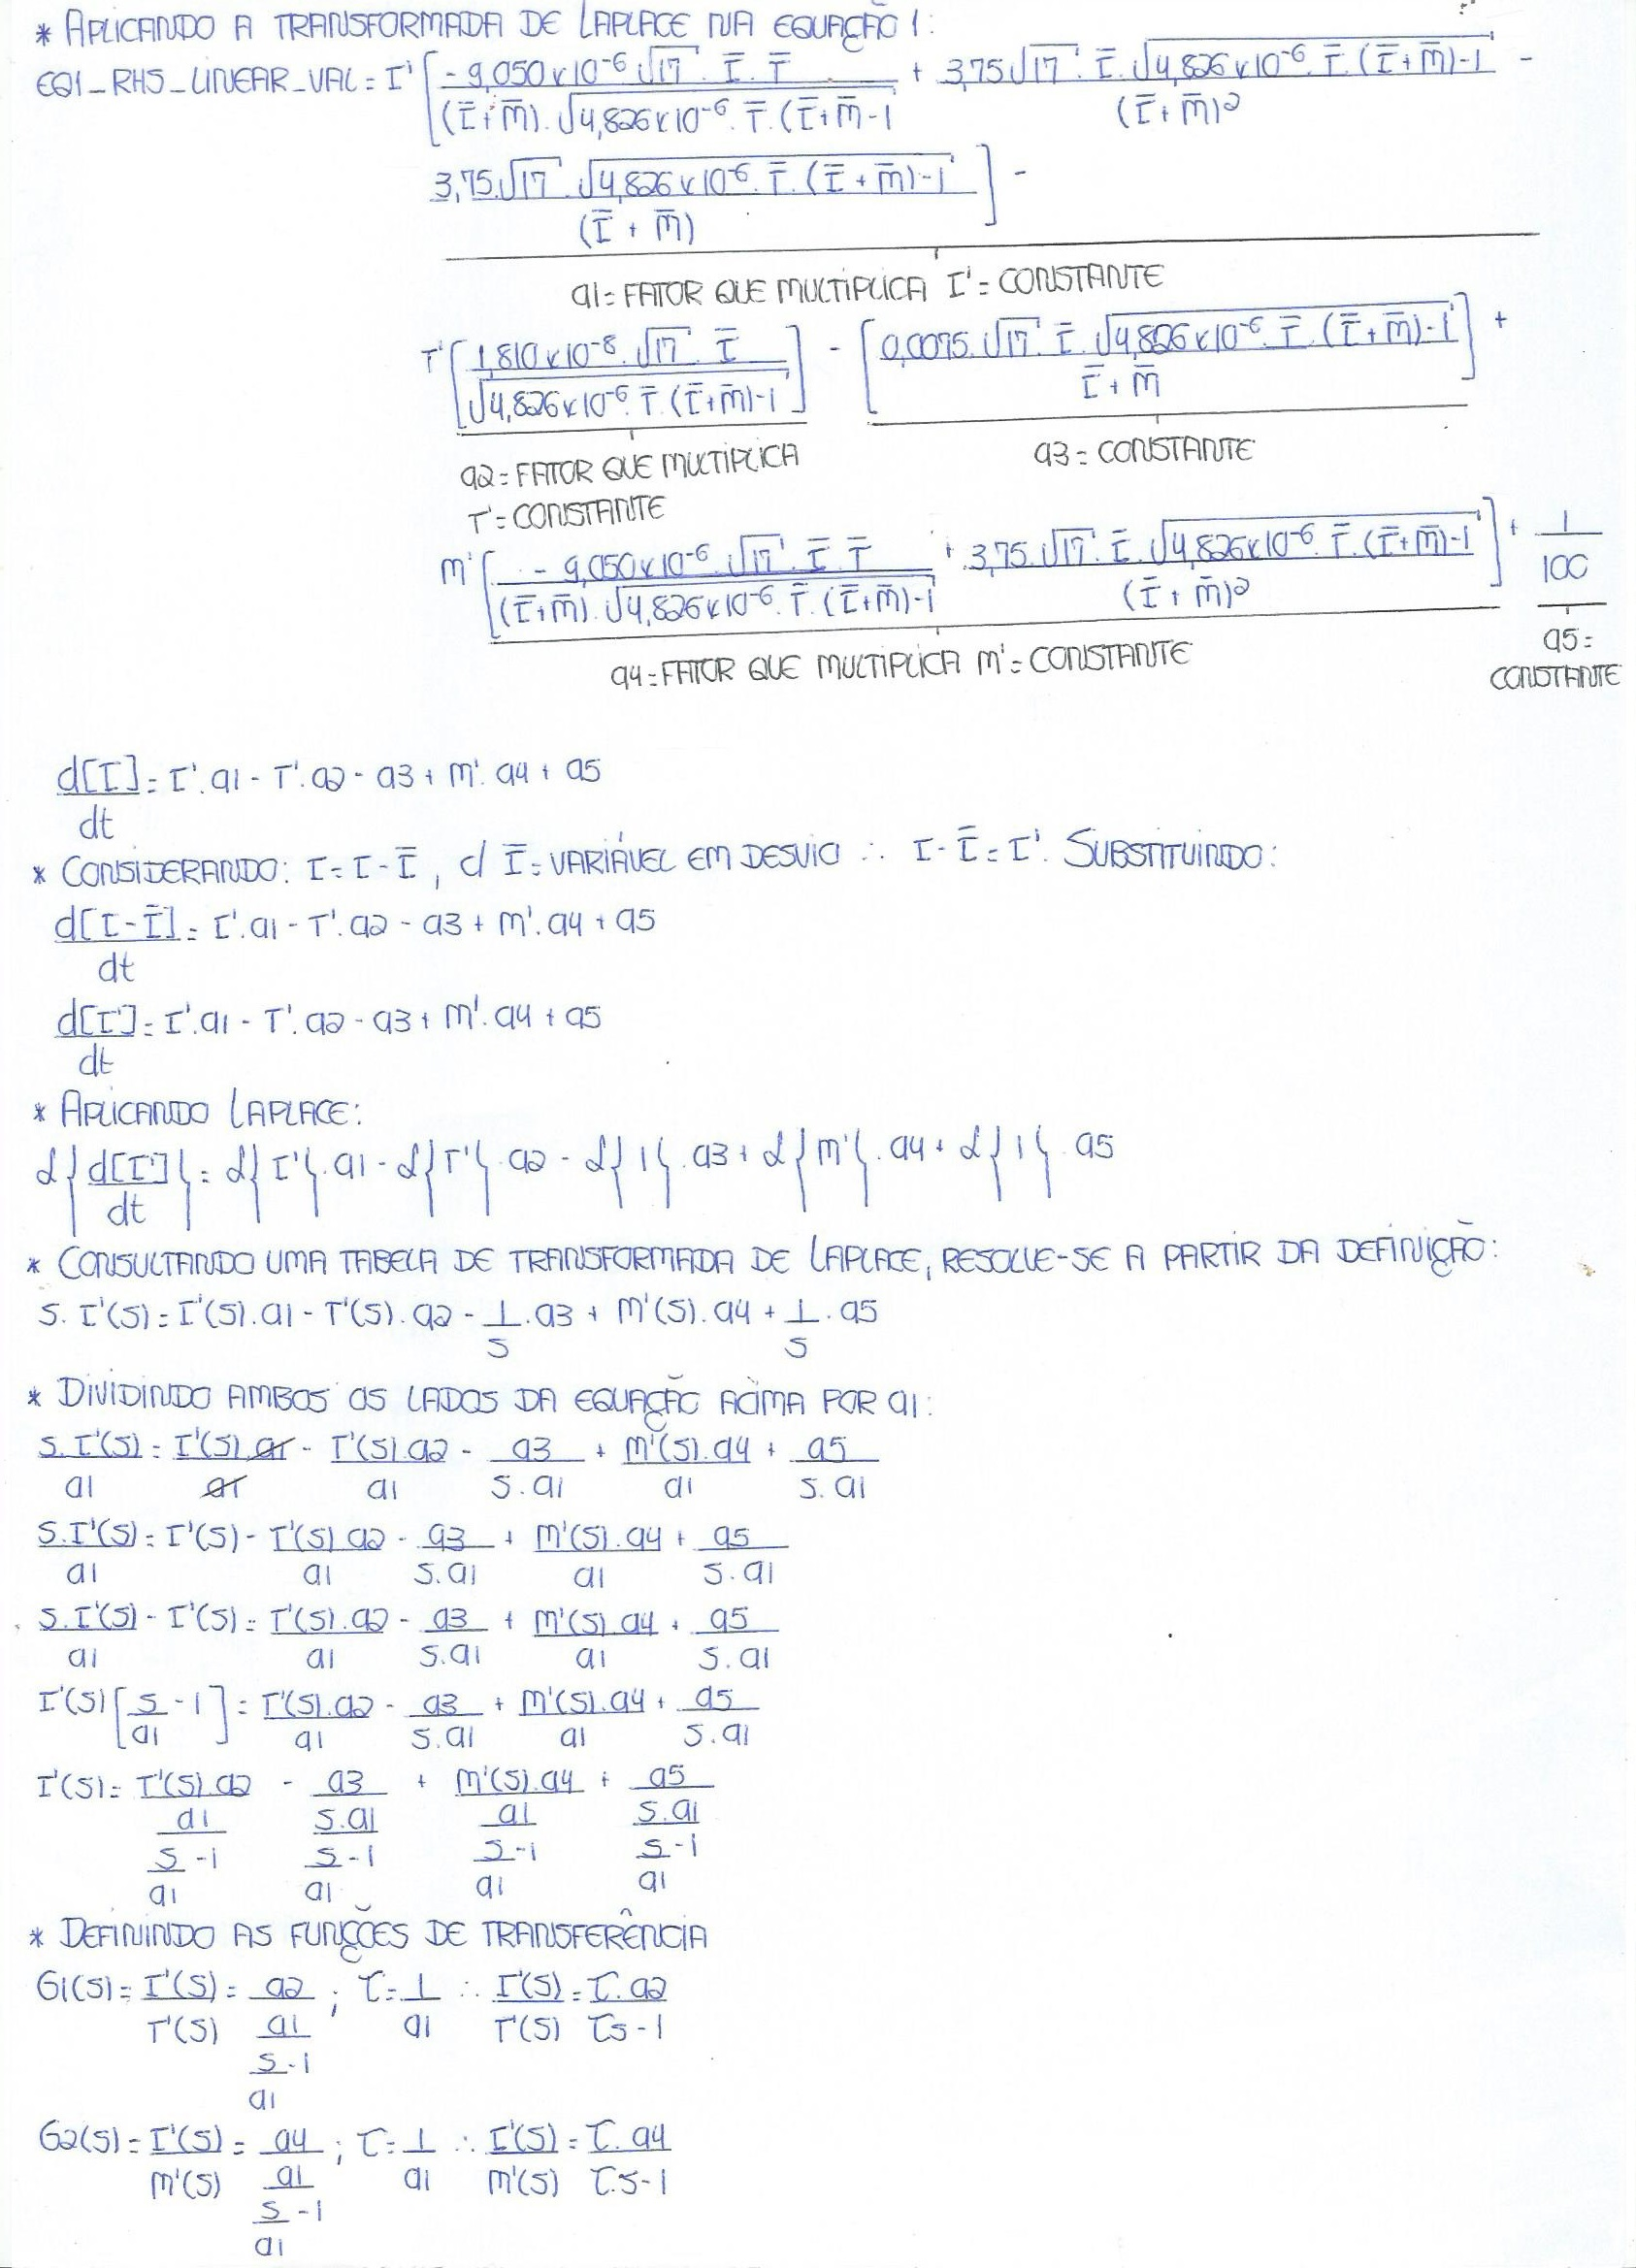

**3.1.2 Equação 2**

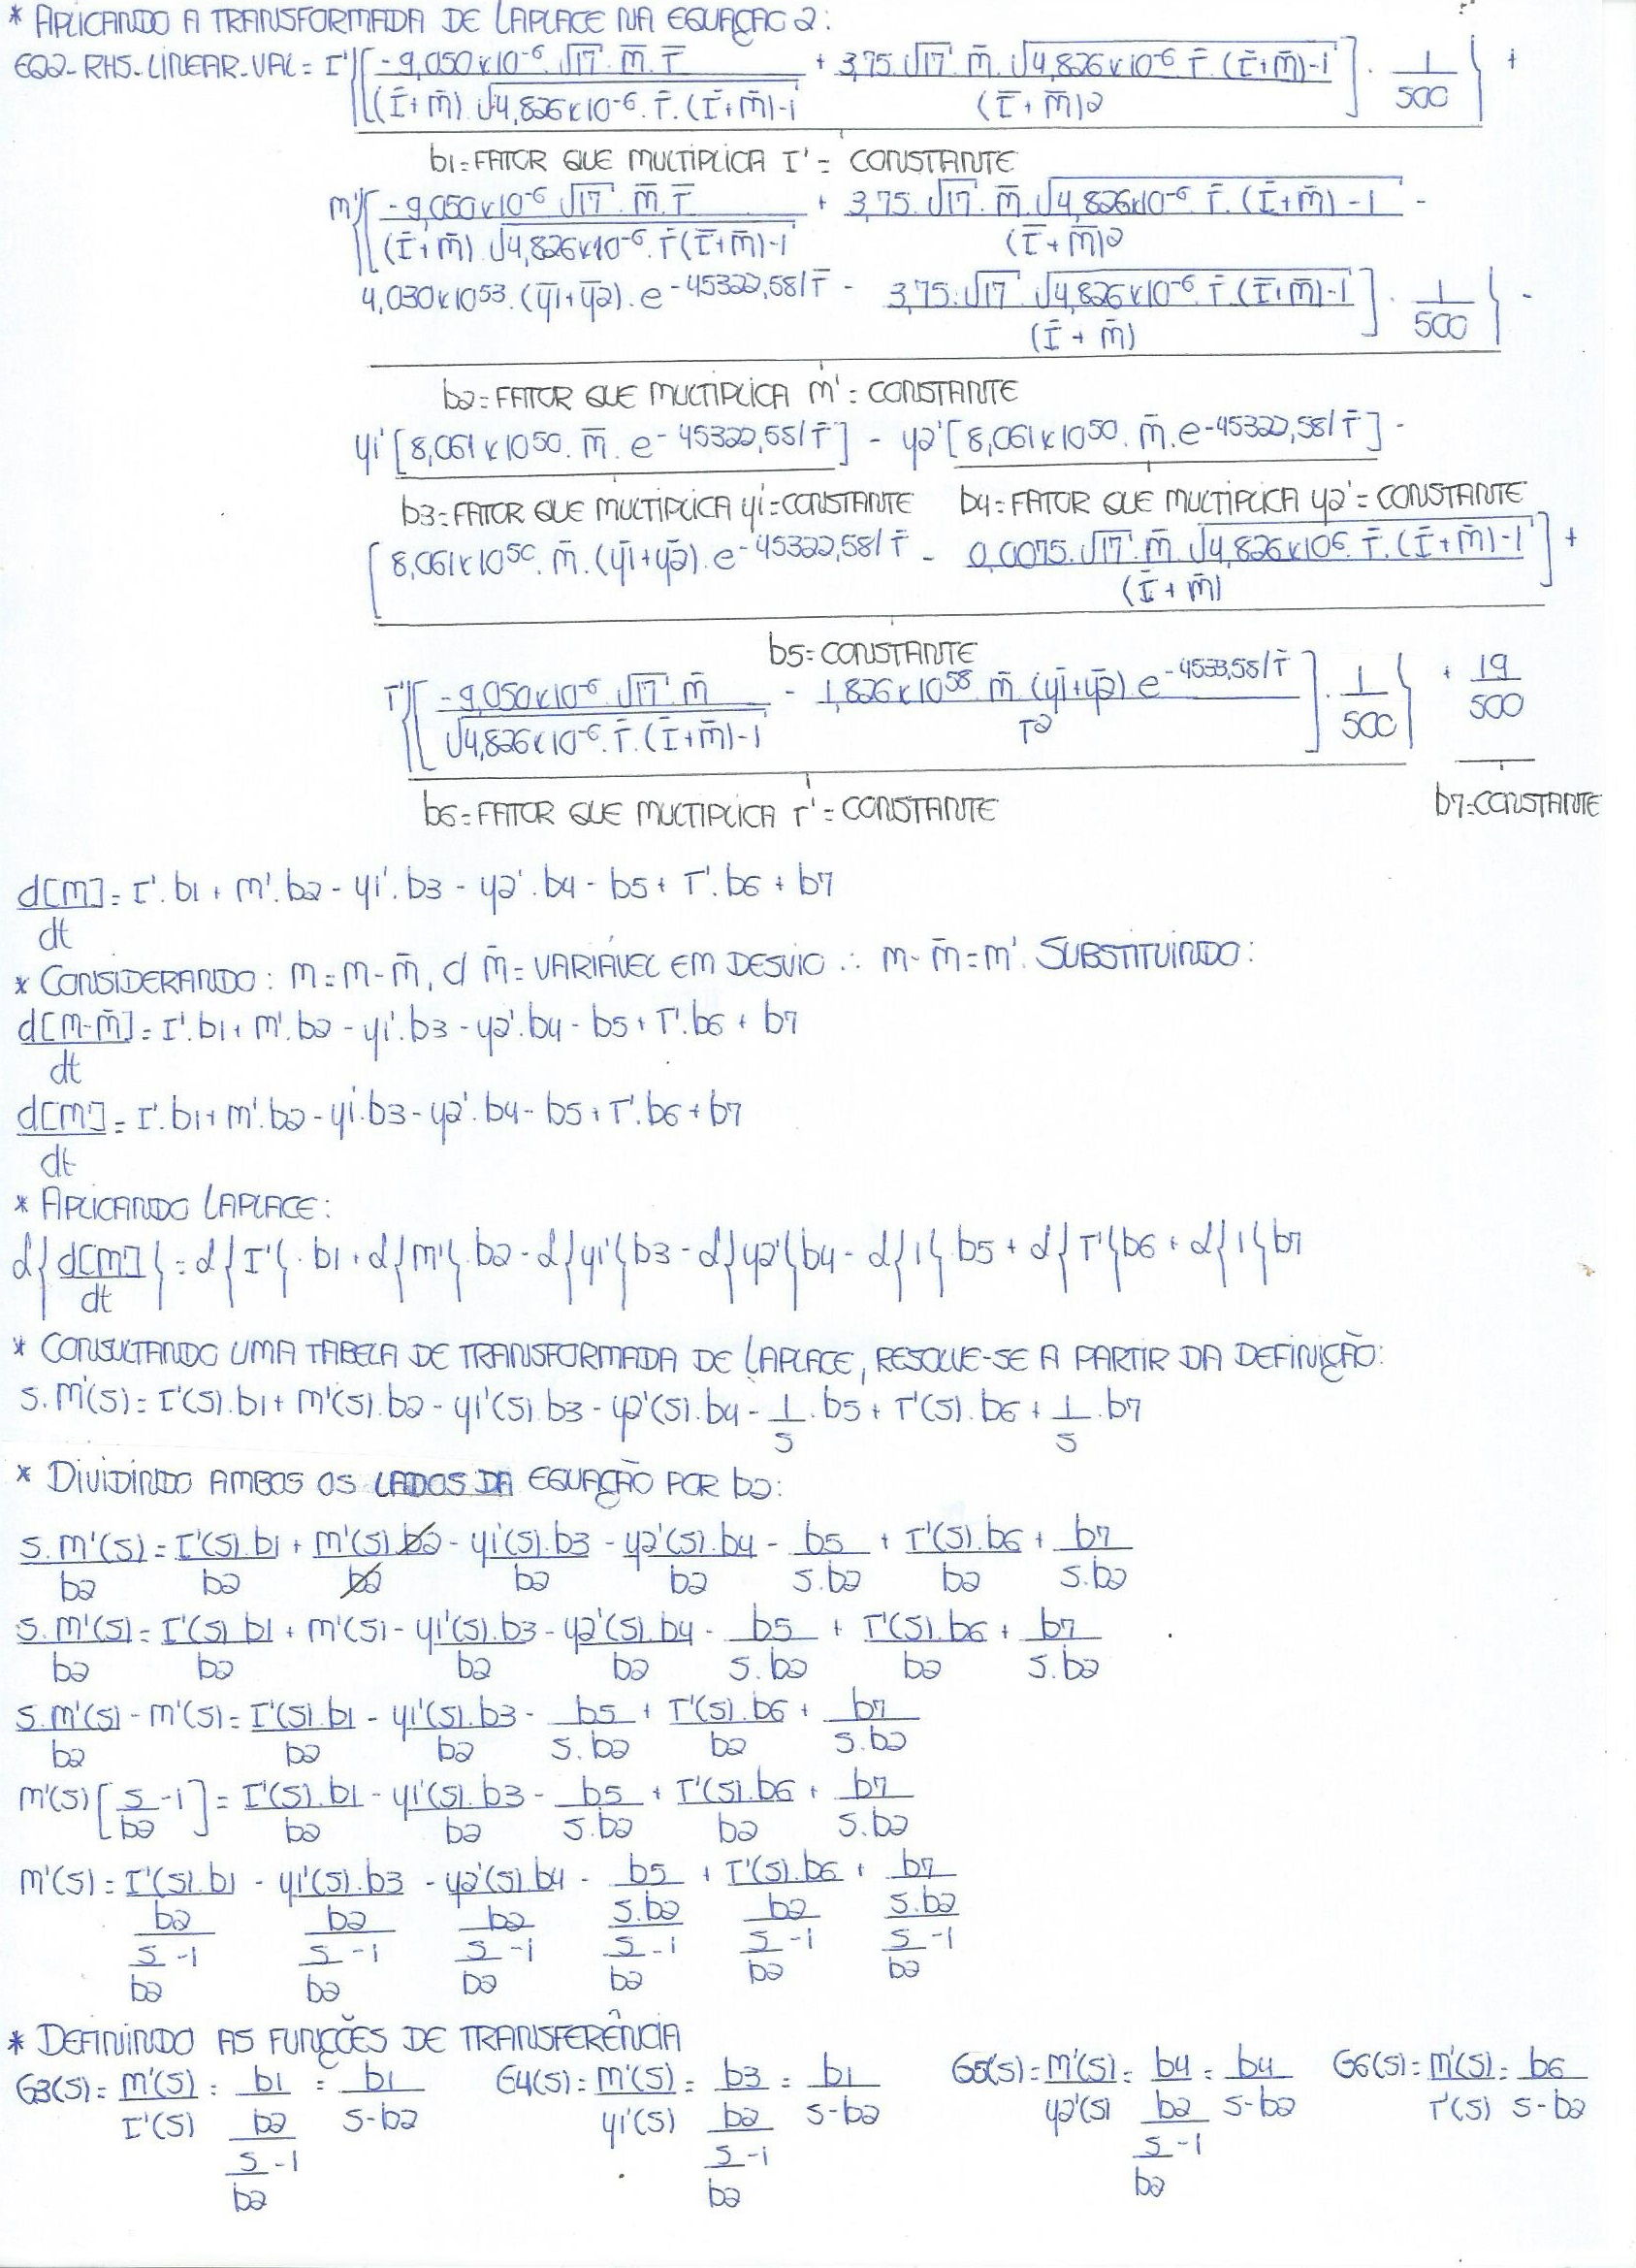

**3.1.3 Equação 3**

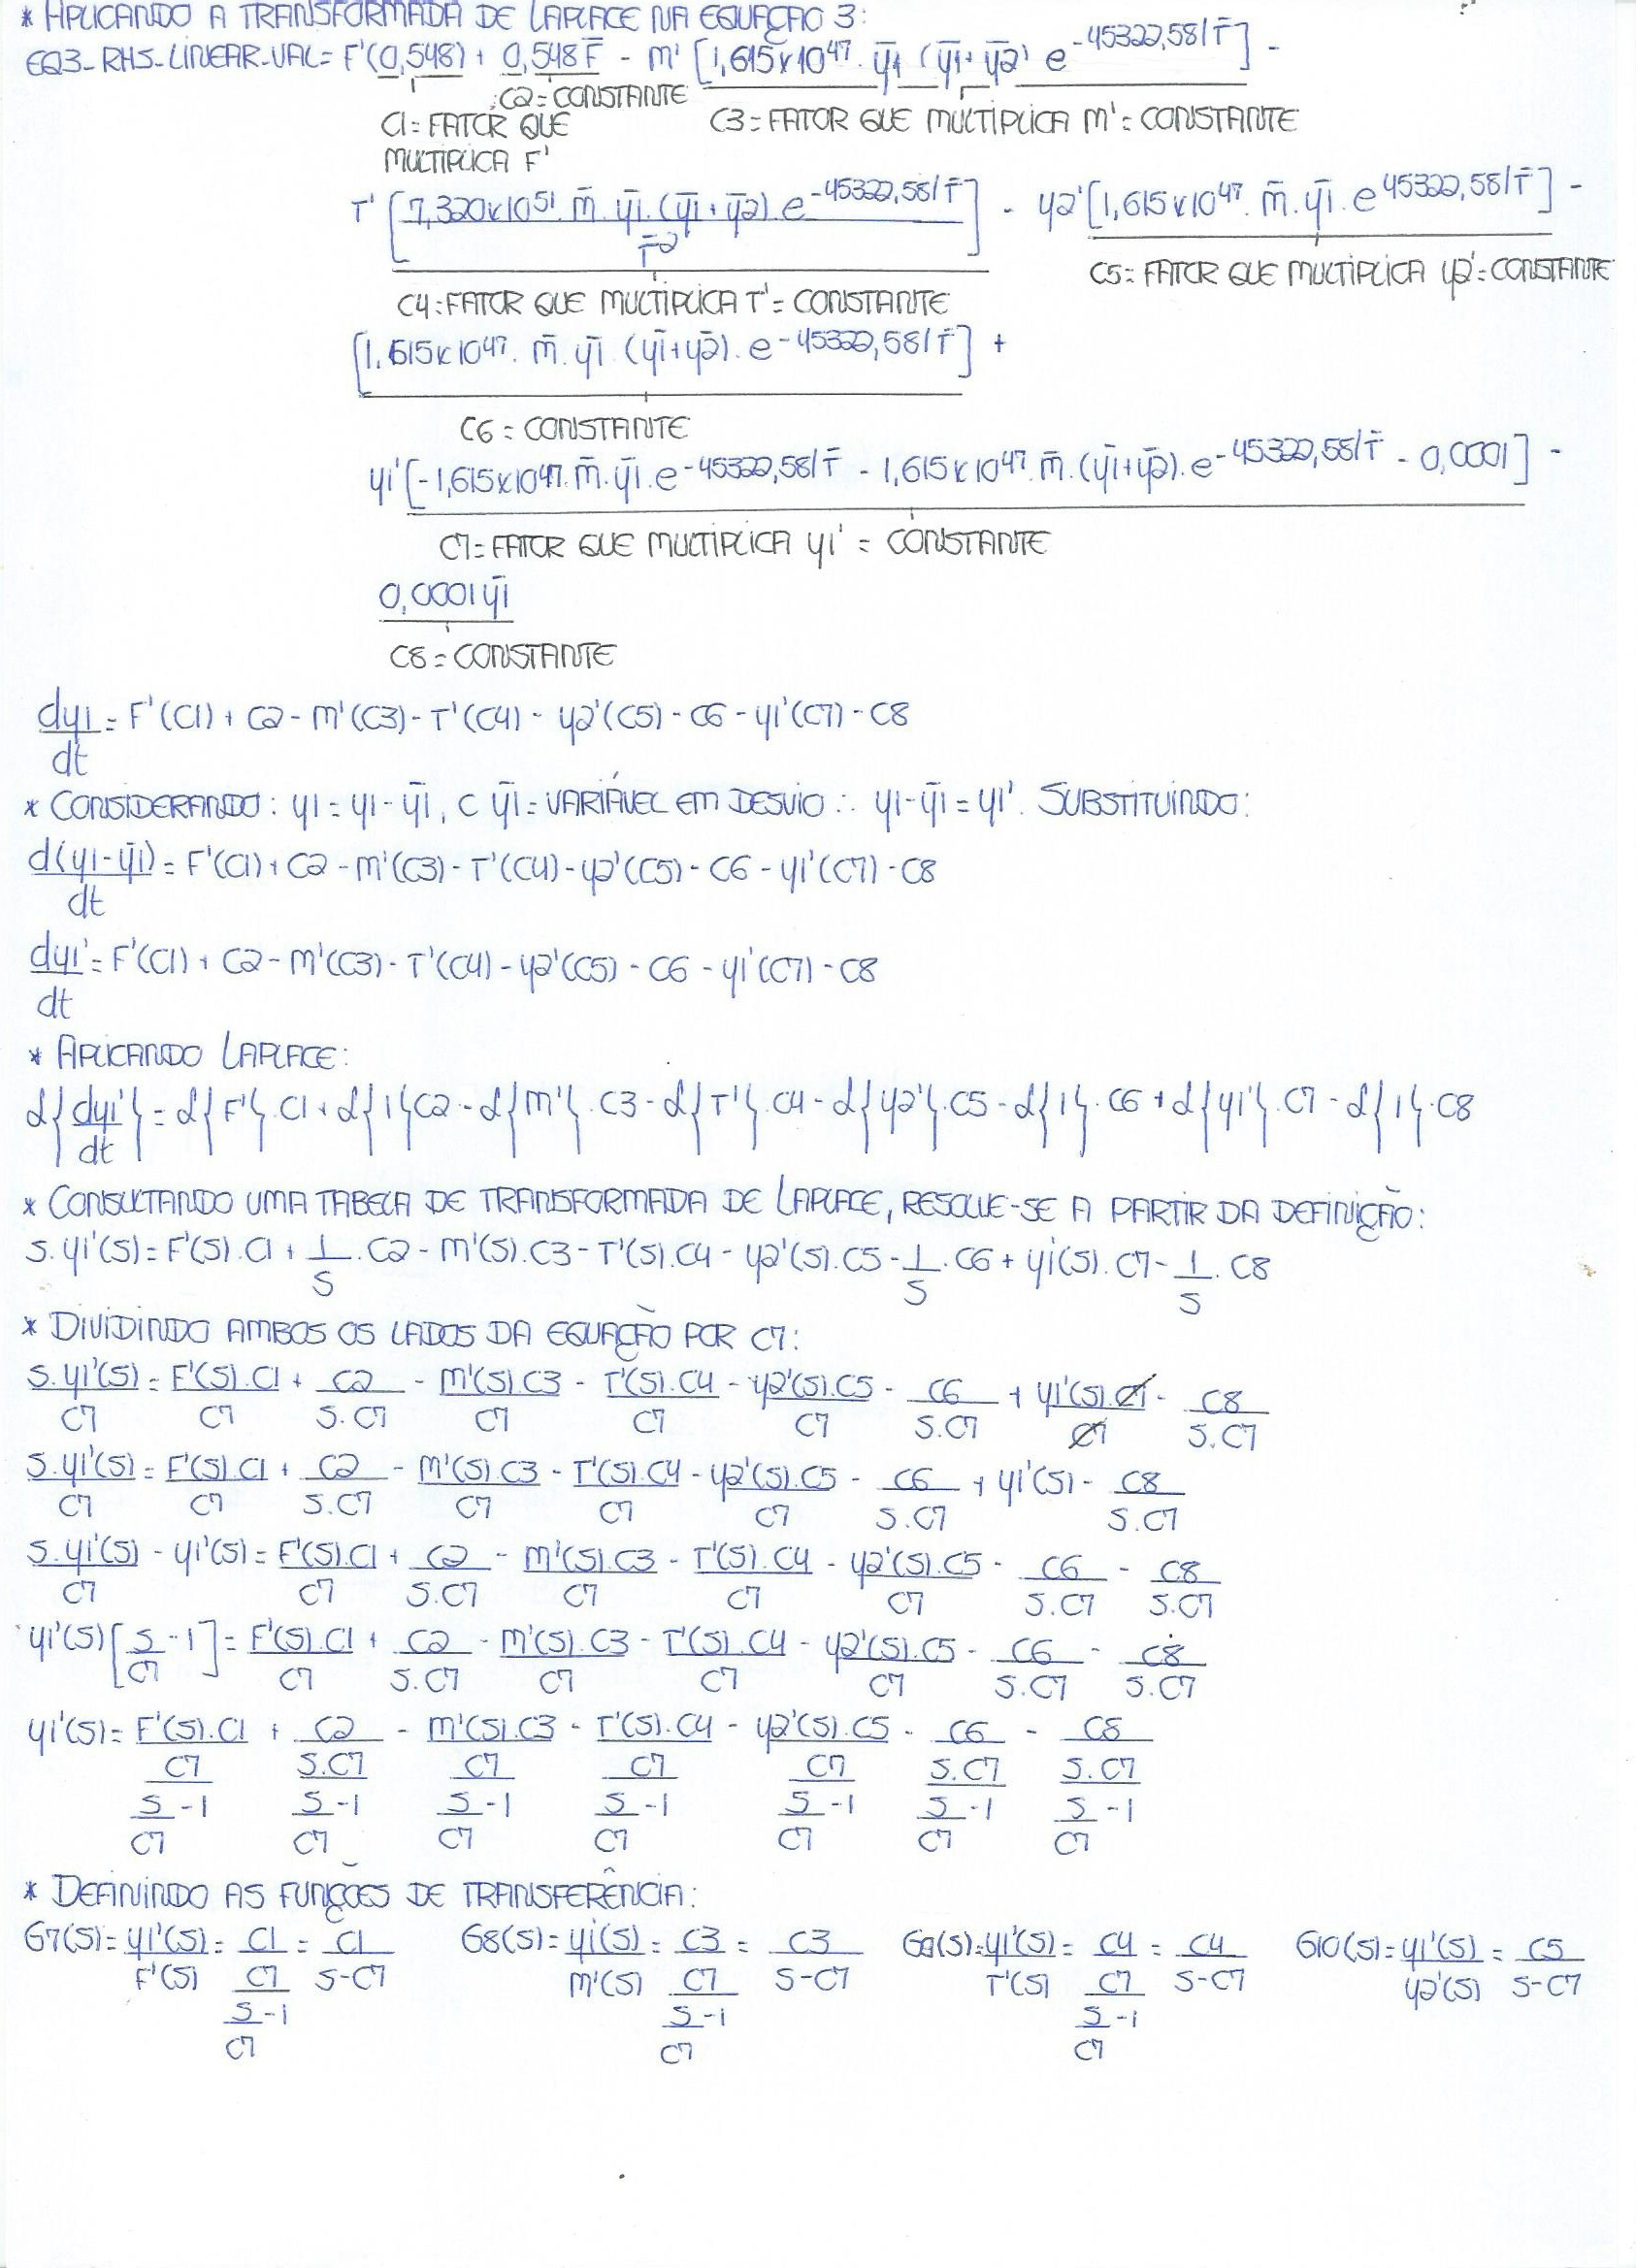

**3.1.4 Equação 4**

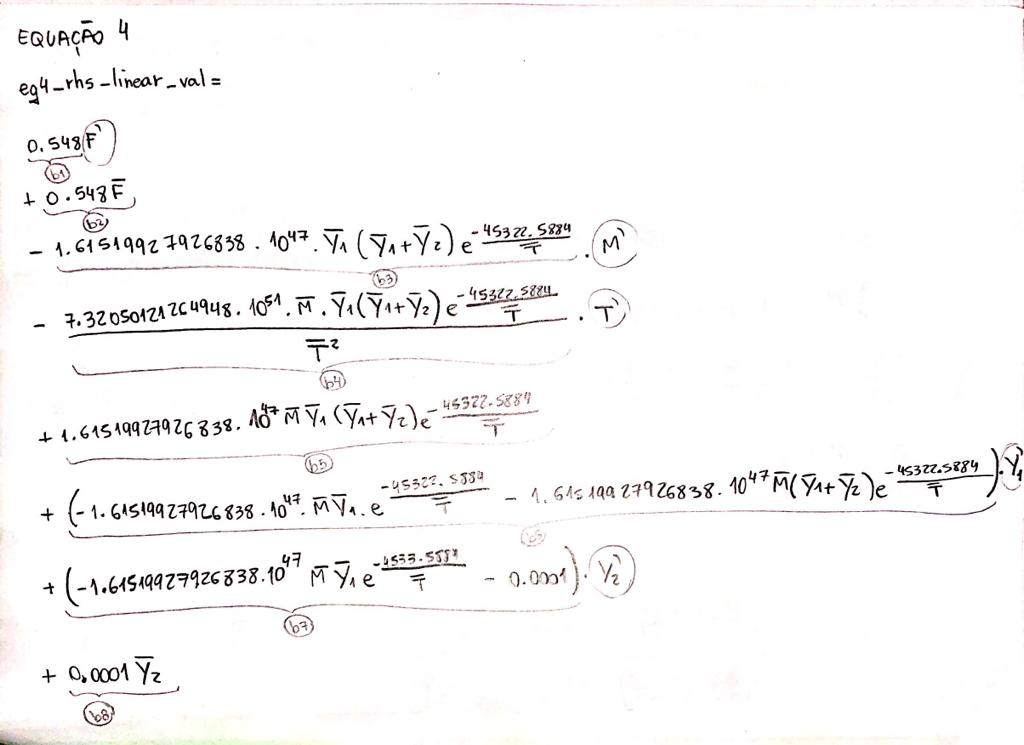



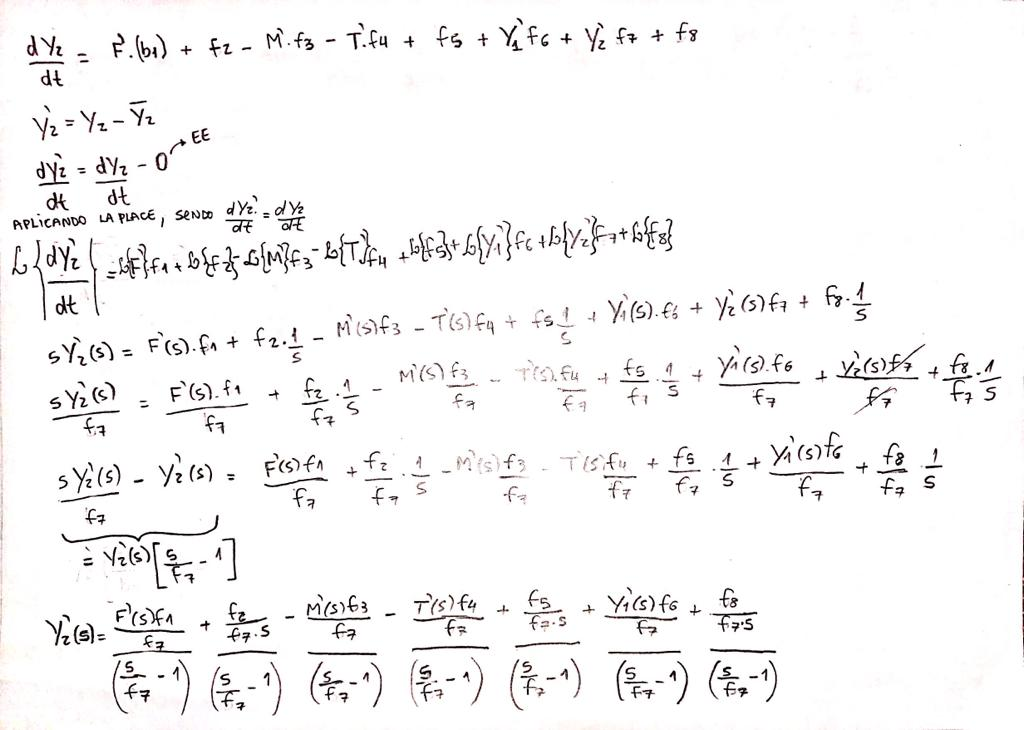

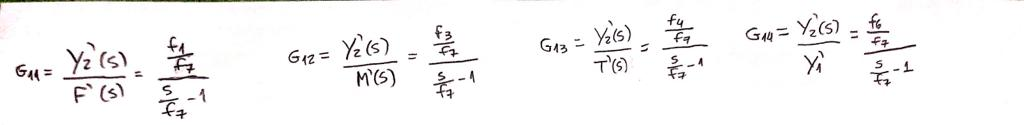

**3.1.5 Equação 5**

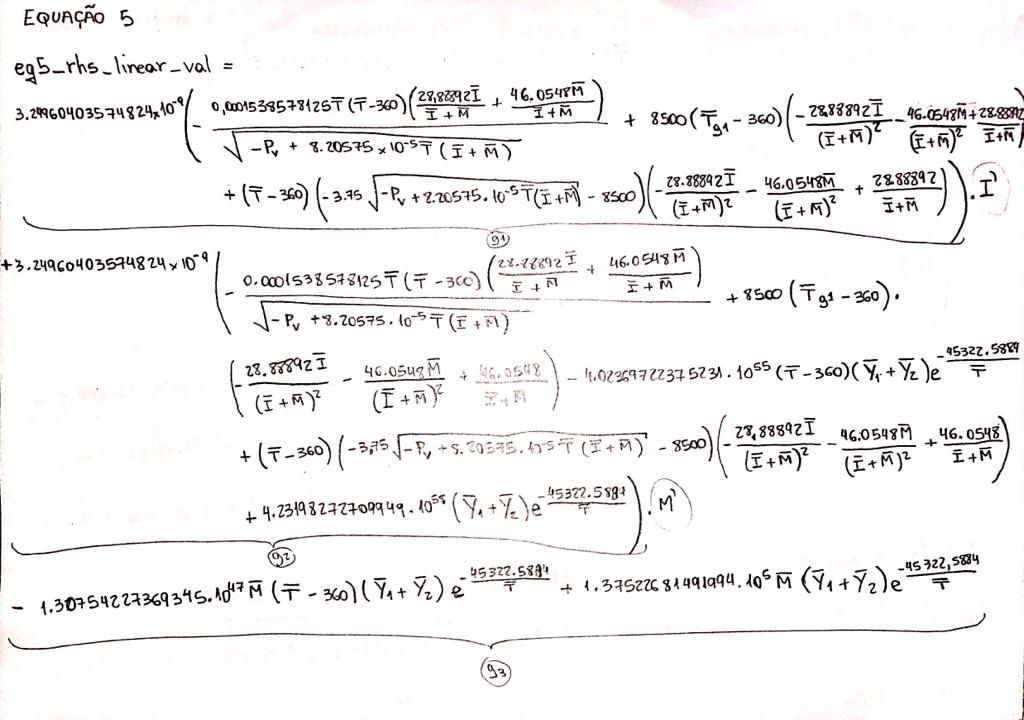

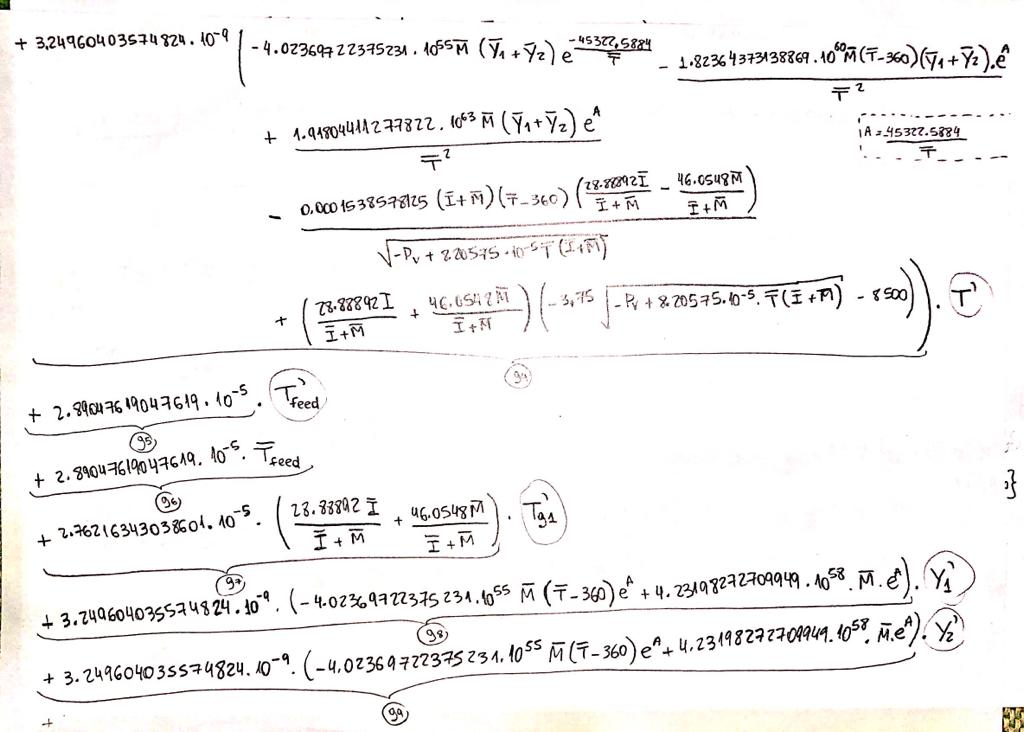

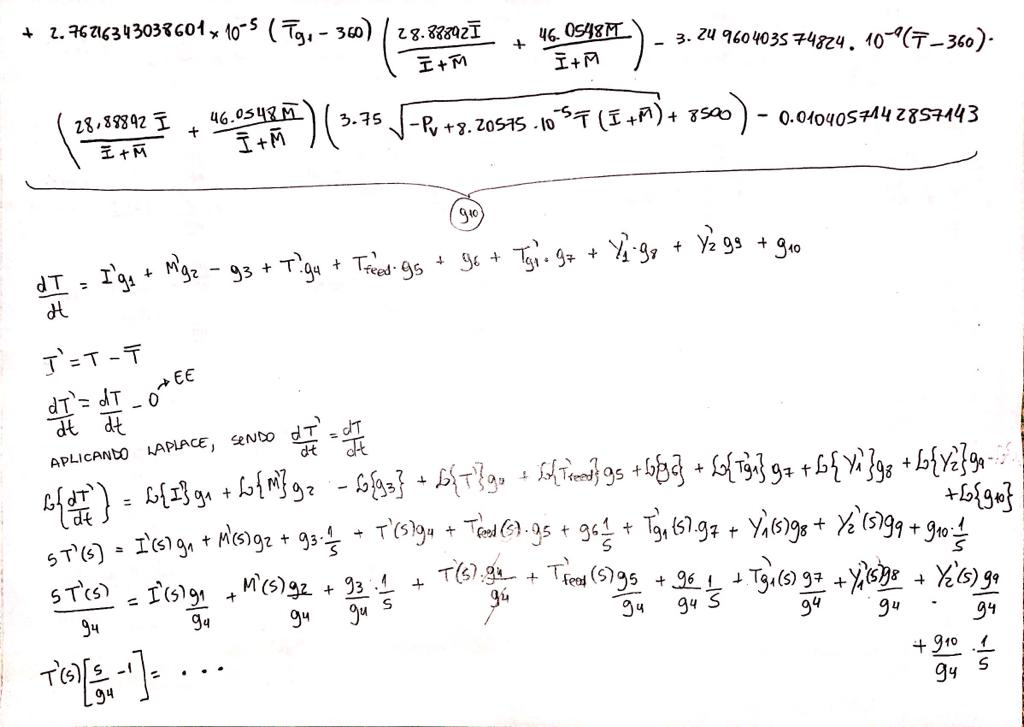

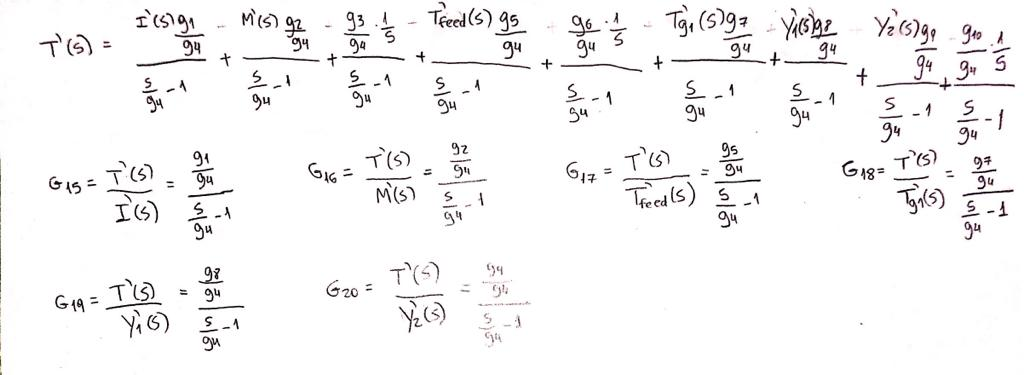

**3.1.6 Equação 6**

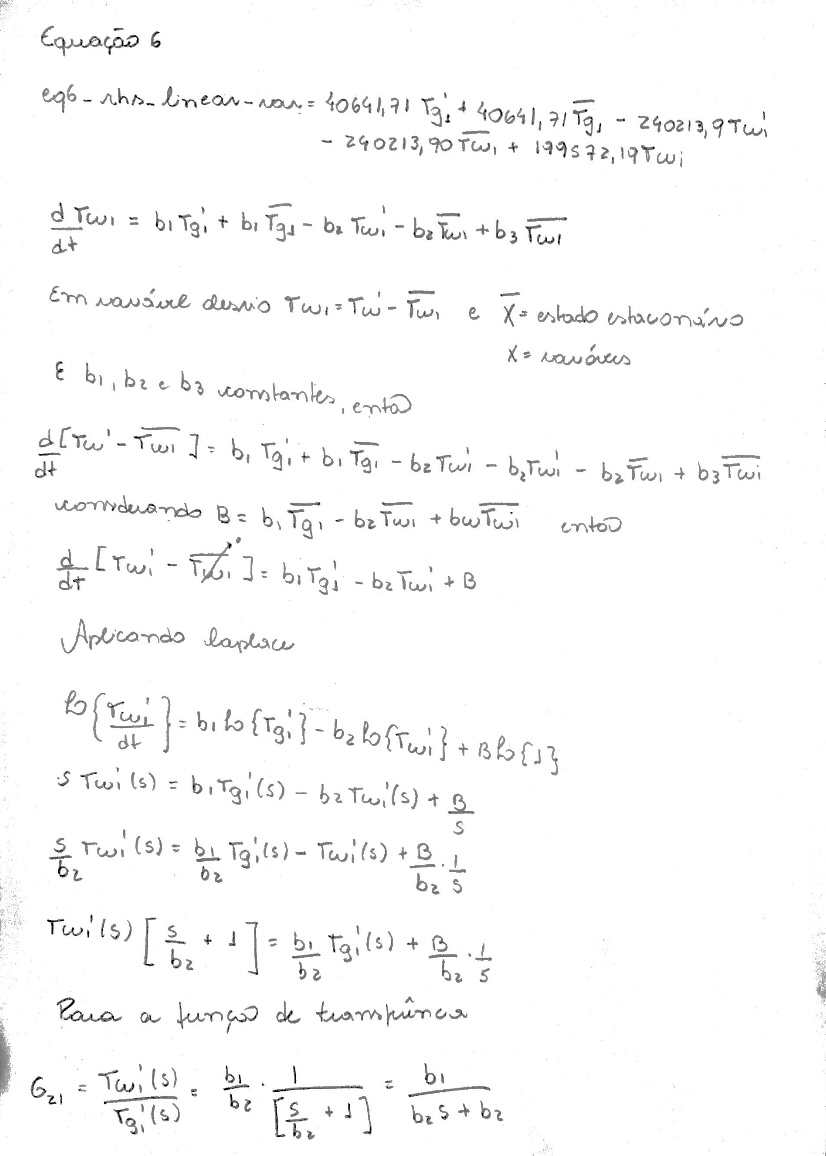

**3.1.7 Equação 7**

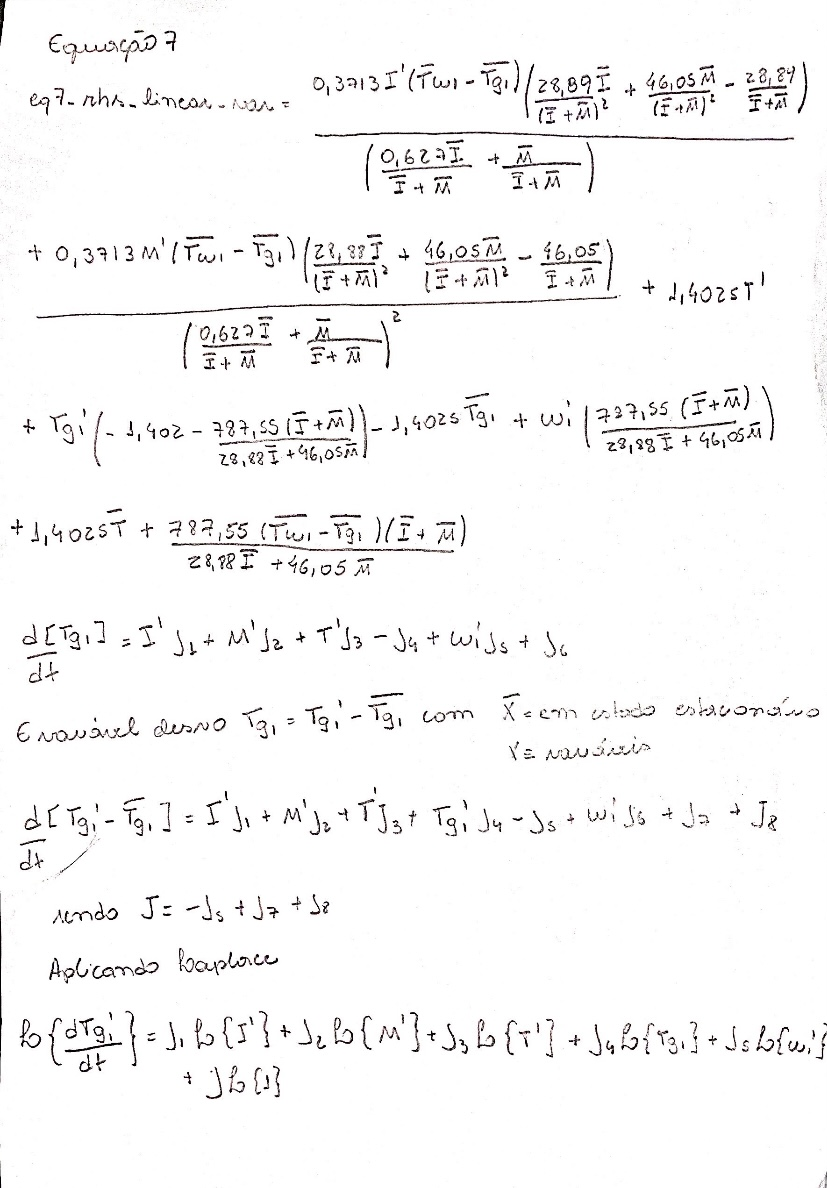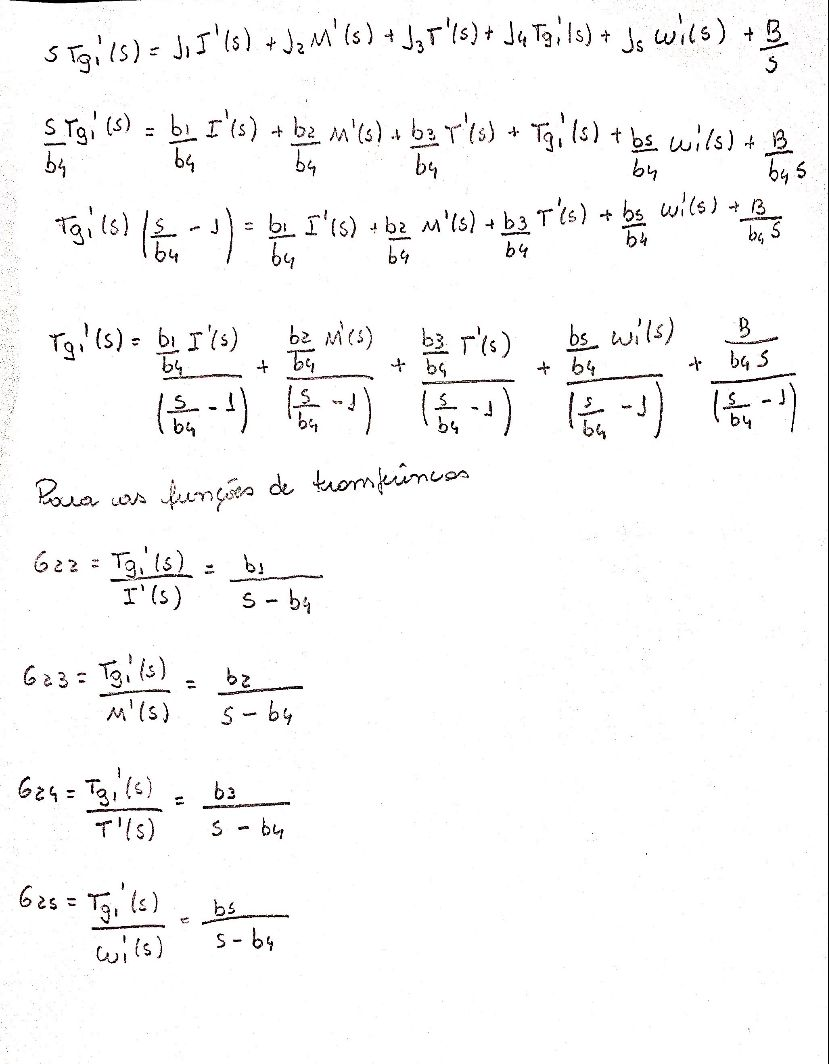

**3.2 Diagrama de Blocos**

O diagrama abaixo foi feito utilizando o Scilab. 

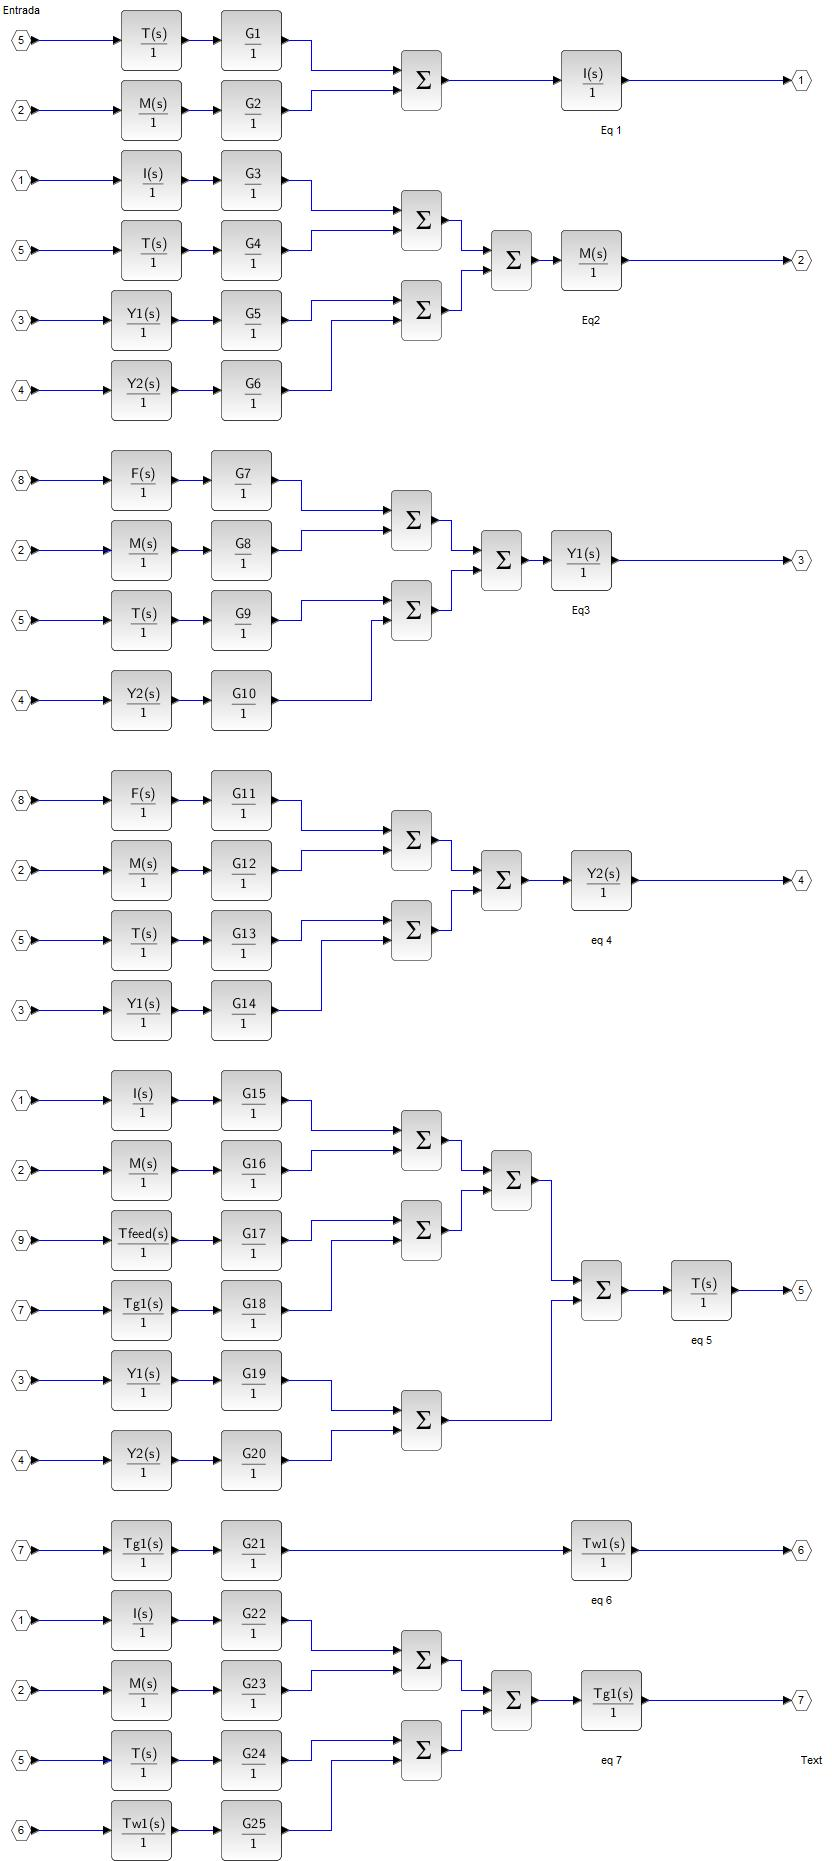

## Atividade 4

**Selecione apenas uma variável de controle, sua variável manipulada e liste as variáveis de perturbação. Com base nesta seleção e em uma sólida análise de engenharia, defina a forma das funções de transferência do atuador $ G_ {a} (s) $ e do sensor $ G_ {m} (s) $, incluindo os valores numéricos de seus parâmetros. Desenvolva o diagrama de blocos de malha fechada para esta malha de controle assumindo um controlador PID e sua respectiva função de transferência. Obtenha as funções de transferência de malha fechada para esta aplicação de controle. Insira células de texto para descrever o processo de desenvolvimento passo a passo.**

**4.1 Defenindo as variáveis considerando (Fc e Tfeed) como variáveis de entrada e (In_con, M1_con, Y1, Y2, T, Tw1, Tg1) como variáveis de saída:**
  
Variável controlada: T (Temperatura do reator)

Variável manipulada: Fc (Vazão do catalisador)

Variável pertubada: Tfeed (Temperatura da corrente de alimentação do reator)


**4.2 Função de transferência do atuador:**
$$G_a(s) = \frac{K_a}{\tau_a \cdot s + 1 }  $$

**4.3 Função de transferência do sensor:**
$$ G_m(s) = K_m \exp (-t_d\cdot s)  $$

**4.4 Diagrama de blocos de malha fechada:**

O diagrama abaixo foi feito utilizando o Scilab. 
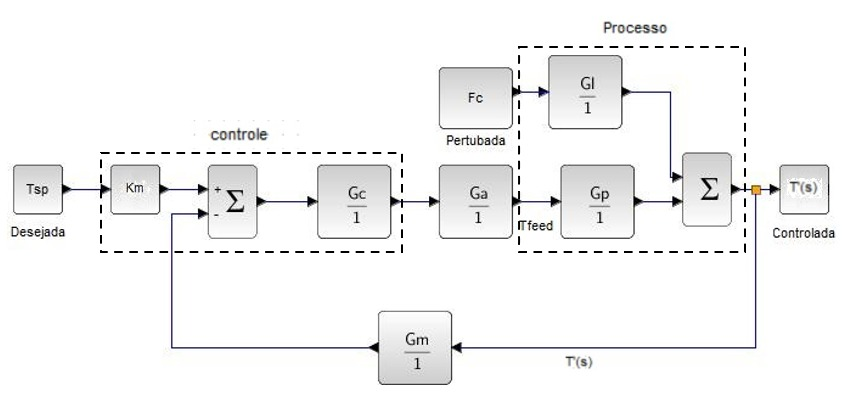

**4.5 Obtenção da função de transferência de malha fechada:**

Ponto de soma antes do controlador:
 
 $$E = T_{sp}(s) \cdot K_m - G_m \cdot T´(s) $$

Do processo se tem:

$$ T´(s) = G_p \cdot (G_a \cdot G_c \cdot E) + G_L \cdot T_feed $$

Substituindo E na equação de T'(s) acima:

 $$ T´(s) = G_p \cdot G_a \cdot G_c \cdot (T_{sp}(s) \cdot K_m - G_m \cdot T´(s)) + G_L \cdot T_feed $$

 Manipulando a equação:

$$ T´(s) = G_p \cdot G_a \cdot G_c \cdot T_{sp}(s) \cdot K_m - G_p \cdot G_a \cdot G_c \cdot G_m \cdot T´(s) + G_L \cdot T_feed $$

$$  T´(s) + G_p \cdot G_a \cdot G_c \cdot G_m \cdot T´(s)  = G_p \cdot G_a \cdot G_c \cdot T_{sp}(s) \cdot K_m + G_L \cdot T_feed $$

$$  T´(s) \cdot (1 + G_p \cdot G_a \cdot G_c \cdot G_m)  = G_p \cdot G_a \cdot G_c \cdot T_{sp}(s) \cdot K_m + G_L \cdot T_feed $$

$$  T´(s) = \frac{G_p \cdot G_a \cdot G_c \cdot T_{sp}(s) \cdot K_m + G_L \cdot T_feed }{1 + G_p \cdot G_a \cdot G_c \cdot G_m} $$

Reorganizando a equação:

$$ T´(s) = \frac{G_p \cdot G_a \cdot G_c \cdot T_{sp}(s) \cdot K_m}{1 + G_p \cdot G_a \cdot G_c \cdot G_m} + \frac{G_L \cdot T_feed }{1 + G_p \cdot G_a \cdot G_c \cdot G_m} $$

A equação acima fornece as funções de transferência de malha fechada: $G_{sp}$ e $G_{load}$. Portanto, 

$$ T'(s) = (G_{sp} \cdot T_{sp}) +  (G_{load} \cdot T_{feed}) $$

As entradas do sistema são Tsp e Tfeed e a variável controlada é a saída do sistema.

A dinâmica e a estabilidade do sistema estudado são governados pelo polinômio característicos de malha fechada:

$$1 + G_p \cdot G_a \cdot G_c \cdot G_m = 0$$

A primeira função de transferência da equação acima se refere a parcela do controle servo, pois $$T_{feed} = 0 → T'(s) = G_{sp} \cdot T_{sp} $$ 

A segunda parcela se refere a parcela do controle regulatório, pois $$T_{sp} = 0 → T'(s) = G_{load} \cdot T_{feed} $$


## Atividade 5

**Com base nos modelos de código fornecidos, adapte-o ao seu modelo e insira as células de código adaptadas. Tome cuidado com a descrição do código (por exemplo, ajuda, comentários, unidades de medida). As células de código devem incluir a configuração, a função de atualização do modelo, o código necessário para obter as funções de transferência, bem como o código para obter a curva de reação do processo.**

In [ ]:
def polyeth_update(t, x, u, params={}):
  """Gas phase polyethylene reactor dynamics.

    Dadebo, S. A., Bell, M. L., McLellan, P. J., & McAuley, K. B. (1997). 
    Temperature control of industrial gas phase polyethylene reactors. 
    Journal of Process Control, 7(2), 83–95.
    https://www.sciencedirect.com/science/article/pii/S0959152496000169

    McAuley, K. B. (1991). Modelling, Estimation and Control of Product 
    Properties in a Gas Phase Polyethylene Reactor. Ph.D. Thesis.
    https://macsphere.mcmaster.ca/handle/11375/8939

    Parameters
    ----------
    x : array
         System state: In_con, molar concentration of inert components in the 
                       gas phase in mol/m3
                       M1_con, molar concentration of ethylene in the 
                       gas phase in mol/m3
                       Y1, moles of active site type 1, mol
                       Y2, moles of active site type 2, mol
                       T, reactor temperature in K
                       Tw1, temperature of cooling water stream leaving stage 1
                       of heat exchanger in K
                       Tg1, temperature of recycle gas stream leaving stage 1 
                       of heat exchanger in K
    u : array
         System input: Fc, flow rate of catalyst in kg/s
                       Tfeed, feed temperature in K

    Returns
    -------
    y : array
        The time derivatives of In_con, M1_con, Y1, Y2, T, Tw1 and Tg1

    """
  ########################TABELA 3#######################################
  # Set up the system parameters
  Vg    = params.get('Vg', 500.)                   # m3
  Vp    = params.get('Vp',  0.5)                    # 
  Pv    = params.get('Pv',  17.)                   # atm
  Bw    = params.get('Bw', 7.0e4)                  # kg
  kp0   = params.get('kp0', 85.0e-3)               # m3/(mol s) 
  Ea    = params.get('Ea', 9e3*4.1868)             # J/mol  
  Cpm1  = params.get('Cpm1', 11*4.1868)            # J/(mol K)  
  Cv    = params.get('Cv', 7.5)                    # atm^-0.5
  Cpw   = params.get('Cpw', 4.1868e3)              # J/(kg K)
  CpIn  = params.get('CpIn', 6.9*4.1868)           # J/(kg K)
  Cppol = params.get('Cppol', 0.85e3*4.1868)       # J/(kg K)
  kd1   = params.get('kd1', 1e-4)                  # s^-1
  kd2   = params.get('kd2', 1e-4)                  # s^-1
  Mw1   = params.get('Mw1', 28.05e-3)              # kg/mol
  Mw    = params.get('Mw', 3.314e4)                # kg
  Mg    = params.get('Mg', 6060.5)                 # mol
  MrCpr = params.get('MrCpr', 1.4*4.1868e7)        # J/K
  Hreac = params.get('Hreac', -894*4.1868e3)       # J/kg
  UA    = params.get('UA', 1.14*4.1868e6)          # J/(K s)
  FIn   = params.get('FIn', 5.)                    # mol/s
  FM1   = params.get('FM1', 190.)                  # mol/s
  Fg    = params.get('Fg', 8500.)                  # mol/s
  Fw    = params.get('Fw', 3.11e5*18e-3)           # kg/s
  Tf    = params.get('Tf', 360.)                   # K
  Twi   = params.get('Twi', 280.0)                # K
  RR    = params.get('RR', 8.20575e-5)             # (m3 atm)/(mol K)
  R     = params.get('R', 8.314)                   # J/(mol K)
  ac    = params.get('ac', 0.548)                  # mol/kg

  # Define variables for reactor state and inputs
  In_con = x[0]     # molar concentration of inert components in the gas phase
  M1_con = x[1]     # molar concentration of ethylene in the gas phase
  Y1     = x[2]     # moles of active site type 1
  Y2     = x[3]     # moles of active site type 2
  T      = x[4]     # reactor temperature
  Tw1    = x[5]     # temperature of cooling water stream leaving stage 1 of heat exchanger
  Tg1    = x[6]     # temperature of recycle gas stream leaving stage 1 of heat exchanger

  Fc     = u[0]     # flow rate of catalyst
  Tfeed  = u[1]     # feed temperature

  ##############TABELA 2#################################################
  # Define the algebric equations
  bt   = Vp * Cv * np.sqrt((M1_con+In_con) * RR * T - Pv)
  RM1  = M1_con * kp0 * np. exp(-Ea/R*(1/T-1/Tf)) * (Y1+Y2)
  Cpg  = M1_con/(M1_con + In_con) * Cpm1 + In_con/(M1_con + In_con) * CpIn
  Hf   = FM1 * Cpm1 * ( Tfeed - Tf) + FIn * CpIn * (Tfeed - Tf)
  Hg1  = Fg * (Tg1 - Tf) * Cpg
  Hg0  = (Fg + bt) * (T - Tf) * Cpg
  Hr   = Hreac * Mw1 * RM1
  Hpol = Cppol * (T - Tf) * RM1 * Mw1

##################TABELA 1##################################
  # Define the ODEs
  dIn_condt = (FIn - In_con/(M1_con + In_con) * bt)/Vg
  dM1_condt = (FM1 - M1_con/(M1_con + In_con) * bt - RM1)/Vg
  dY1dt     = Fc * ac - kd1 * Y1 - RM1 * Mw1 * Y1/ Bw
  dY2dt     = Fc * ac - kd2 * Y2 - RM1 * Mw1 * Y2/ Bw
  dTdt      = (Hf + Hg1 - Hg0 - Hr - Hpol)/(MrCpr + Bw * Cppol)
  dTw1dt    = Fw/Mw * (Twi - Tw1) - UA/(Mw * Cpw) * (Tw1 - Tg1)
  dTg1dt    = Fg/Mg * (T - Tg1)   + UA/(Mg * Cpg) * (Tw1 - Tg1)

  return [dIn_condt, dM1_condt, dY1dt, dY2dt, dTdt, dTw1dt, dTg1dt]

In [ ]:
#Criação do sistema não linear com as entradas, saídas e propriedades.
polyeth = ct.NonlinearIOSystem(
    polyeth_update, None, name='polyeth',
    inputs  = ('Fc', 'Tfeed'), 
    outputs = ('In_con', 'M1_con', 'Y1', 'Y2', 'T', 'Tw1', 'Tg1'), 
    states  = ('In_con', 'M1_con', 'Y1', 'Y2', 'T', 'Tw1', 'Tg1'))

print(polyeth)

System: polyeth
Inputs (2): Fc, Tfeed, 
Outputs (7): In_con, M1_con, Y1, Y2, T, Tw1, Tg1, 
States (7): In_con, M1_con, Y1, Y2, T, Tw1, Tg1, 


In [ ]:
#Achando o ponto de equilíbrio para o sistema a partir de um chute inicial.
ct.iosys.find_eqpt(polyeth,x0 = [400.00, 300, 2, 2, 300.00, 200, 200], u0 = [5.8/3600, 293.00])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in sqrt


(None, None)

In [ ]:
#Linearização do sistema buscando o melhor ponto de operação
polyeth_linearized = polyeth.linearize(x0 = [439.68, 326.72, 3.835, 3.835, 
                                             356.21, 290.37, 294.36], 
                                       u0 = [5.8/3600, 293.00])
print(polyeth_linearized)

System: sys[0]
Inputs (2): u[0], u[1], 
Outputs (7): y[0], y[1], y[2], y[3], y[4], y[5], y[6], 
States (7): x[0], x[1], x[2], x[3], x[4], x[5], x[6], 


In [ ]:
#Definição da função de transferência
polyeth_tf = ct.ss2tf(polyeth_linearized)

polyeth_tf

TransferFunction([[array([7.99736950e-19, 2.15210651e-07, 5.02745061e-06, 8.67779126e-07,
       2.62449370e-09]), array([-1.68264589e-09, -3.92990462e-08, -6.59192509e-09,  1.19408201e-11,
        2.36185363e-15])], [array([-5.32428265e-02, -1.24366734e+00, -2.12110531e-01, -2.17952949e-04,
       -7.88785471e-09]), array([-3.85946488e-07, -9.01474813e-06, -1.53002784e-06, -3.23412139e-10,
       -9.80524861e-15])], [array([ 5.48000000e-01,  1.27997947e+01,  2.16890254e+00, -1.60215499e-04,
        1.77701866e-06,  6.18522145e-11]), array([-2.95588836e-10, -6.90417557e-09, -1.17081439e-09, -7.74839280e-14,
       -1.15672925e-18])], [array([ 5.48000000e-01,  1.27997947e+01,  2.16890254e+00, -1.60215499e-04,
        1.77701866e-06,  6.18522145e-11]), array([-2.95588836e-10, -6.90417557e-09, -1.17081439e-09, -7.74839280e-14,
       -1.15672925e-18])], [array([9.11541205e-03, 2.12913185e-01, 3.61321810e-02, 6.81628032e-06,
       2.41178898e-10]), array([2.89047632e-05, 6.75179308e-04, 1

In [ ]:
#A função de transferência extraída da matriz acima, localizada na linha 5 coluna 0, relaciona  a variável manipulada (Fc) e a variável controlada (T).
polyeth_tf[5,0]

TransferFunction(array([2.76701184e-17, 4.70884694e-16, 3.83371087e-04, 2.45593158e-08,
       3.06150471e-13]), array([1.00000000e+00, 2.33575389e+01, 3.96367458e+00, 6.96341338e-04,
       3.50494021e-06, 6.99989800e-10, 2.00267186e-14]))

In [ ]:
#Encontrando as raízes da função de transferência para verificar se o sistema em malha aberta é instável ou estável
ct.pole(polyeth_tf[5,0])

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


array([-2.31865933e+01+0.j        , -1.70774891e-01+0.j        ,
        1.47134720e-05+0.00094025j,  1.47134720e-05-0.00094025j,
       -1.65513121e-04+0.j        , -3.45562115e-05+0.j        ])

Ao analisar as raízes da função de transferência que relaciona Fc e T, percebe-se que duas das raízes encontradas são positivas, podendo concluir que o sistema em malha aberta é um sistema instável. Porém, esses polos positivos são elevados a uma potência de quinta ordem, ou seja, são números positivos muito pequenos, que tendem à zero.

In [ ]:
#Analisando a matriz que contém os zeros do sistema: valores que zeram a função.
ct.zero(polyeth_tf[5,0])

array([-8.50887073e+00+3722238.26184838j,
       -8.50887073e+00-3722238.26184838j,
       -4.71103000e-05      +0.j        ,
       -1.69511710e-05      +0.j        ])

Os resultados acima mostram que todos os zeros da função são negativos, o que na prática resulta em um controlador estável.

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


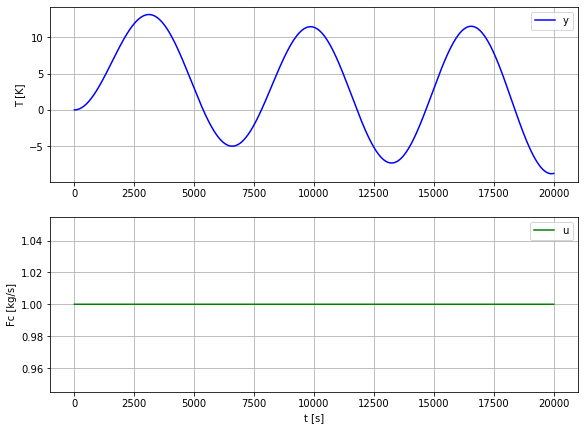

In [ ]:
#Resposta da cursão de reação do sistema
#Definindo o tempo de simulação
T0 = 1 #s
T1 = 20000 #s
dt = 0.01   
nt = int (T1/dt) + 1 #número de pontos no tempo de simulação
T = np.linspace(T0, T1, nt)

#Simulação
Ga = 11.6/(3600*(20-4)) #considerando um degrau de 6mA
Gm = (20-4)/(750-300) #faixas retiradas das figuras 8 
Gp = polyeth_tf[5,0]
T, yout = ct.step_response(1e4*Ga*Gp*Gm, T) #resposta do degrau

#Resposta da curva de reação do processo
plt.close ('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure(1, figsize=(fig_width_cm /2.54 , fig_height_cm /2.54))
plt.subplot(2, 1, 1)
plt.plot(T, yout, 'blue')
plt.ylabel('T [K]')
plt.grid()
plt.legend(labels =('y',))
plt.subplot(2, 1, 2)
plt.plot(T, [1]*len(T), 'green')
plt.ylabel('Fc [kg/s]')
plt.xlabel('t [s]')
plt.grid()
plt.legend(labels =('u', ))

A partir da análise do gráfico observa-se um sistema oscilatório quando é aplicado um degrau igual a 1, portanto, esse sistema não é de primeira ordem com tempo morto e, por isso, não é possível obter uma curva de reação. Além disso, percebe-se que a temperatura em desvio oscila até a faixa de 10ºC e não estabiliza com o passar do tempo de simulação. 

**5.1 Análise do sistema**

Observando como o processo reage quando há a pertubação de um degrau na entrada.

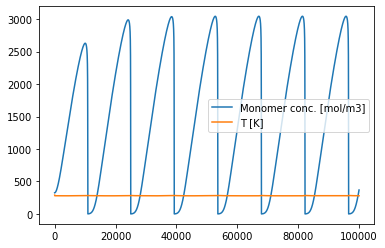

In [ ]:
#Resposta da cursão de reação do sistema
#Definindo o tempo de simulação
T0 = 0
T1 = 1e5
dt = 1
nt = int (T1/dt) + 1 #número de pontos no tempo de simulação
T = np.linspace(T0, T1, nt)

#Simulação
x0 = [439.68, 326.72, 3.835, 3.835, 356.21, 290.37, 294.36]
t, y = ct.input_output_response(polyeth, T, [[8e-4]*len(T), [0]*len(T)], x0)

#Resposta
plt.figure(1)
plt.plot(t, y[1])
plt.plot(t, y[5])
plt.legend(['Monomer conc. [mol/m3]', 'T [K]'])
plt.show(block=False)

Gráfico 0 - Concentração de monômeros versus temperatura. 

OBS: a variação da temperatura é inferior à variação do monômero e, por isso, não é possível realizar uma boa análise do gráfico. 

Portanto, fazendo uma análise individual de cada variável:

Gráfico 1 - Concentração molar dos componentes inertes na fase gasosa. 

Sistema oscilatório. 

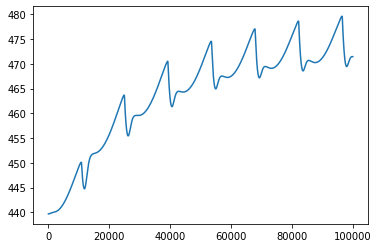

In [ ]:
plt.plot(t, y[0])

Gráfico 2 - Concentração de etileno na fase gasosa. 

Sistema oscilatório. 

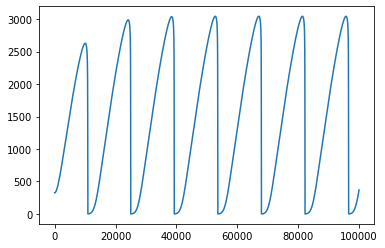

In [ ]:
plt.plot(t, y[1])

Gráfico 3 - Quantidade de mol do sítio ativo tipo 1.

Sistema oscilatório.

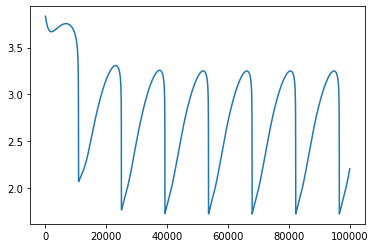

In [ ]:
(plt.plot(t, y[2]))


Gráfico 4 - Quantidade de mol do sítio ativo tipo 2.

Sistema oscilatório.

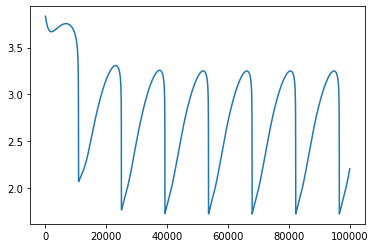

In [ ]:
plt.plot(t, y[3])

Gráfico 5 - Temperatura do reator.

A temperatura do reator oscila em malha aberta. 

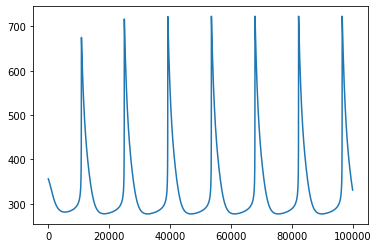

In [ ]:
plt.plot(t, y[4])

Gráfico 6 - Temperatura da corrente de água de resfriamento saindo do estágio 1 do trocador de calor.

Sistema oscilatório.

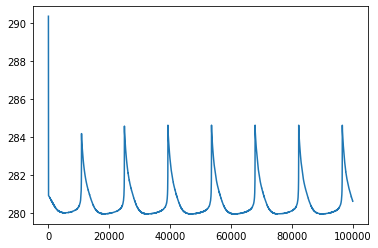

In [ ]:
plt.plot(t, y[5])

Gráfico 7 - Temperatura da corrente de reciclo.

Sistema oscilatório.

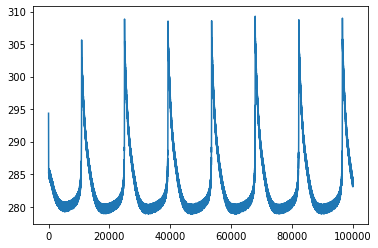

In [ ]:
plt.plot(t, y[6])

Analisando todos os gráficos gerados acima, é possível observar que quando uma pertubação é aplicada, todo o sistema em malha aberta fica instável, pois todas as variáveis são oscilatórias.

## Atividade 6

**Use a curva de reação do processo obtida na Atividade 5 para desenvolver uma aproximação FOLPD (ou IPD) da função de transferência da curva de reação do processo $ G_ {PRC} (s) $. Insira células de texto para descrever o processo de desenvolvimento passo a passo.**

**NOTA: FOLPD significa atraso de primeira ordem mais atraso de tempo e IPD significa integral mais atraso de tempo.**

Conforme mostrado anteriormente, todo o sistema em malha aberta possui uma resposta oscilante. Sendo assim, torna-se inviável utilizar uma configuração de controlador com base em uma curva de reação de processo: $G_{PRC}$. Consequentemente, não é possível fazer o uso de relações de sintonia empíricas, conforme pedido na **Atividade 7**, a qual não será resolvida no presente trabalho. 

Uma maneira para resolver o sistema em questão é utilizar o método de **Síntese Direta** [(Referência)](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=124). Esse método foge da ideia de obter um ajuste do controlador até obter a resposta desejada do sistema. No caso da síntese direta, é definido qual a resposta de malha fechada desejada e, a partir disso, projeta-se um controlador de acordo, sendo que esse controlador não precisar ser, necessariamente, um PID. Nesse caso, o resultado está diretamente ligado ao modelo do processo.

**Síntese direta:** A função de malha fechada é dada por: 
 $$\frac{C}{R} = \frac {Km G_c G_a G_p}{1 + G_p \cdot G_a \cdot G_c \cdot G_m } $$

$$G_C = \frac {1}{G_p \cdot K_a  } \cdot (K_m \cdot \tau_c \cdot s +1 - K_m)$$

Considerando a fução de transferência do processo (Gp) definida como:

$$ G_p = \frac{2.767\cdot 10^{-17}s^4 + 4.709 \cdot 10^{-16}\cdot s^3  + 0.0003834\cdot s ^2 + 2.456\cdot 10^{-8} \cdot s + 3.062 \cdot 10^{-13}}{s^6+ 23.36\cdot s^5 + 3.964 \cdot s^4 + 0.0006963 \cdot s^3 + 3.505 \cdot 10^{-6}\cdot s^2 + 7\cdot 10^{-10} \cdot s + 2.003 \cdot 10^{-14}} $$

Substituindo Gp em Gc obtém-se:

$$ G_c  = \frac {s^6+ 23.36\cdot s^5 + 3.964 \cdot s^4 + 0.0006963 \cdot s^3 + 3.505 \cdot 10^{-6}\cdot s^2 + 7\cdot 10^{-10} \cdot s + 2.003 \cdot 10^{-14}}{2.767\cdot 10^{-17}s^4 + 4.709 \cdot 10^{-16}\cdot s^3  + 0.0003834\cdot s ^2 + 2.456\cdot 10^{-8} \cdot s + 3.062 \cdot 10^{-13}} \cdot (\frac {1}{\tau_c . s}) $$

Definindo os valores numéricos como parâmetros da função para facilitar a visualização: 

$A = 23.36 \space  B = 3.964 \space C=0.0006963 \space D= 3.505.10^{-6} \space E= 7\cdot 10^{-10} \space F=2.003 \cdot 10^{-14} \space H=2.767\cdot 10^{-17} \space I= 4.709 \cdot 10^{-16} \space J= 0.0003834 \space K=2.456\cdot 10^{-8} \space L=3.062 \cdot 10^{-13}$
​
$$\space$$
Substituindo na equação de Gc, tem-se a função do controlador:

$$ G_c  =  \frac {s^6 + A.s^5 + B. s^4 + C.s^3 + D.s^2 + E.s + F}{H.s^4 + I.s^3 + J.s^2 + K.s + L } \cdot (\frac {1}{\tau_c . s}) $$

$$ G_c  =  \frac {s^6 + A.s^5 + B. s^4 + C.s^3 + D.s^2 + E.s + F}{H.s^4 + I.s^3 + J.s^2 + K.s + L } \cdot (\frac {1}{\tau_c . s}) $$

$$ G_c  =  \frac {s^6 + A.s^5 + B. s^4 + C.s^3 + D.s^2 + E.s + F}{H.s^5 .\tau_c  + I.s^4.\tau_c + J.s^3\tau_c  + K.s^2.\tau_c + L\tau_c . s } $$


## Atividade 7: NÃO APLICÁVEL NO PRESENTE TRABALHO

**Com base no modelo fornecido, codifique as regras de ajuste atribuídas à sua equipe. Insira uma célula de código para cada regra de ajuste. Tome cuidado com a descrição do código (por exemplo, ajuda, comentários, unidades de medida) e adapte todo o código à respectiva regra de ajuste.**

## Atividade 8

**Com base na função de transferência da curva de reação do processo $ G_ {PRC} (s) $ obtida na Atividade 6 e as funções codificadas na Atividade 7, escolha uma função de regra de ajuste codificada por cada membro da equipe e obtenha os respectivos valores dos parâmetros do controlador. Forneça uma tabela de resumo listando as regras de ajuste e os parâmetros de controle.**

Como no presente trabalho não é possível utilizar uma configuração de controlador com base em uma curva de reação de processo, não é possível realizar a escolha de regra de ajuste codificada. 

A partir do método utilizado, nessa atividade foi estudado três diferentes valores para $\tau_c$ na função do controlador ($G_c$) como parâmetro de sintonia. Para atribuir esses valores, foi feito uma análise da curva de reação apresentada, a fim de verificar a região de oscilação após a aplicação do degrau, sendo proposto valores de:

$\tau_L$ = 5000 (escolha Larissa)

$\tau_R$ = 7500 (escolha Rebeca)

$\tau_T$ = 10000 (escolha Thaisa)

In [ ]:
#Definindo a equação da transferência que relaciona Fc e T e os seus parâmetros
s = ct.TransferFunction.s
A=23.36
B=3.964
C=0.000693
D=3.505*10**(-6)
E=7*10**(-10)
F=2.003*10**(-14)
H=2.767*10**(-17)
I=4.709*10**(-16)
J=0.0003834
K=2.456*10**(-8)
L=3.062*10**(-13)
tau = 2000 #estimativa
Gc = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tau  + I*s**4*tau + J*s**3*tau  + K*s**2*tau + L*tau*s)
Gc

TransferFunction(array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       2.003e-14]), array([5.534e-14, 9.418e-13, 7.668e-01, 4.912e-05, 6.124e-10, 0.000e+00]))

In [ ]:
#Utilizando tauL
s = ct.TransferFunction.s
tauL = 5000

GcL = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tauL  + I*s**4*tauL + J*s**3*tauL  + K*s**2*tauL + L*tauL*s)
GcL

TransferFunction(array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       2.003e-14]), array([1.3835e-13, 2.3545e-12, 1.9170e+00, 1.2280e-04, 1.5310e-09,
       0.0000e+00]))

In [ ]:
#Utilizando tauR
s = ct.TransferFunction.s
tauR = 7500

GcR = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tauR  + I*s**4*tauR + J*s**3*tauR  + K*s**2*tauR + L*tauR*s)
GcR

TransferFunction(array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       2.003e-14]), array([2.07525e-13, 3.53175e-12, 2.87550e+00, 1.84200e-04, 2.29650e-09,
       0.00000e+00]))

In [ ]:
#Utilizando tauT 
s = ct.TransferFunction.s
tauT = 10000

GcT = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tauT  + I*s**4*tauT + J*s**3*tauT  + K*s**2*tauT + L*tauT*s)
GcT

TransferFunction(array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       2.003e-14]), array([2.767e-13, 4.709e-12, 3.834e+00, 2.456e-04, 3.062e-09, 0.000e+00]))

## Atividade 9

**Escolha dois conjuntos de valores de parâmetro obtidos na Atividades 8, um para PI e outro para controlador PID. Obtenha as funções de transferência de malha fechada para o controle servo usando a função de transferência da curva de reação do processo obtida na Atividade 6. Verifique a estabilidade da malha fechada calculando seus pólos.**

**NOTA: As células de código devem ser inseridas abaixo desta.**

Adaptando a atividade para a resolução desenvolvida, nessa etapa foi calculado as raízes das funções determinadas na Atividade 8. 

In [ ]:
#Raízes da função GcL
ct.pole(1+Ga*Gp*Gm*GcL)

array([-8.50918373e+00+3.72238659e+06j, -8.50918373e+00-3.72238659e+06j,
       -2.31865933e+01+0.00000000e+00j, -1.70774891e-01+0.00000000e+00j,
        1.47134720e-05+9.40247039e-04j,  1.47134720e-05-9.40247039e-04j,
       -1.65513121e-04+0.00000000e+00j, -4.71032538e-05+0.00000000e+00j,
       -3.45562115e-05+0.00000000e+00j, -1.69551708e-05+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j])

In [ ]:
#Raízes da função GcR
ct.pole(GcR)

array([-8.50918373e+00+3722386.58767885j,
       -8.50918373e+00-3722386.58767885j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

In [ ]:
#Raízes da função GcT
ct.pole(GcT)

array([-8.50918373e+00+3722386.58767885j,
       -8.50918373e+00-3722386.58767885j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

Como pode-se notar, as raízes das três funções não se alteram com os valores de $\tau$. Isso pode ser justificado pelo fato dos parâmetros do denominador que são multiplicados pelos valores de $\tau$ serem muito pequenos (potência de ordem -14 ou -13). Como forma de tentativa para analisar essa ocorrência, foi adotado outros valores de $\tau$ para verificar se há a possibilidade da malha fechada ser estável.

$\tau_1$ = 500000 (valor relativamente alto)

$\tau_2$ = 53 (valor relativamente baixo)

$\tau_3$ = 1 (valor muito baixo)


In [ ]:
#Utilizando tau1 e calculando as raízes da função Gc1
s = ct.TransferFunction.s
tau1 = 500000

Gc1 = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tau1  + I*s**4*tau1 + J*s**3*tau1  + K*s**2*tau1 + L*tau1*s)
print(Gc1)
ct.pole(Gc1)


s^6 + 23.36 s^5 + 3.964 s^4 + 0.000693 s^3 + 3.505e-06 s^2 + 7e-10 s + 2.003e-14
--------------------------------------------------------------------------------
     1.383e-11 s^5 + 2.354e-10 s^4 + 191.7 s^3 + 0.01228 s^2 + 1.531e-07 s



array([-8.50918373e+00+3722386.58767885j,
       -8.50918373e+00-3722386.58767885j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

In [ ]:
#Utilizando tau2 e calculando as raízes da função Gc2
s = ct.TransferFunction.s
tau2 = 53

Gc2 = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(H*s**5*tau2  + I*s**4*tau2 + J*s**3*tau2  + K*s**2*tau2 + L*tau2*s)
print(Gc2)
ct.pole(Gc2)


s^6 + 23.36 s^5 + 3.964 s^4 + 0.000693 s^3 + 3.505e-06 s^2 + 7e-10 s + 2.003e-14
--------------------------------------------------------------------------------
   1.467e-15 s^5 + 2.496e-14 s^4 + 0.02032 s^3 + 1.302e-06 s^2 + 1.623e-11 s



array([-8.50918373e+00+3722386.58767885j,
       -8.50918373e+00-3722386.58767885j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

In [ ]:
#Utilizando tau3 e calculando as raízes da função Gc3
s = ct.TransferFunction.s
tau3 = 1

Gc3 = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(tau3*(H*s**5  + I*s**4 + J*s**3  + K*s**2 + L*s))
print(Gc3)
ct.pole(Gc3)


s^6 + 23.36 s^5 + 3.964 s^4 + 0.000693 s^3 + 3.505e-06 s^2 + 7e-10 s + 2.003e-14
--------------------------------------------------------------------------------
  2.767e-17 s^5 + 4.709e-16 s^4 + 0.0003834 s^3 + 2.456e-08 s^2 + 3.062e-13 s



array([-8.50918373e+00+3722386.58767885j,
       -8.50918373e+00-3722386.58767885j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

In [ ]:
#Utilizando tau4 e calculando as raízes da função Gc4
s = ct.TransferFunction.s
tau4 = 1000
Gc4 = (s**6 + A*s**5 + B*s**4 + C*s**3 + D*s**2 + E*s + F)/(tau4*(H*s**5  + I*s**4 + J*s**3  + K*s**2 + L*s))
print(Gc4)
ct.pole(Gc4)


s^6 + 23.36 s^5 + 3.964 s^4 + 0.000693 s^3 + 3.505e-06 s^2 + 7e-10 s + 2.003e-14
--------------------------------------------------------------------------------
    2.767e-14 s^5 + 4.709e-13 s^4 + 0.3834 s^3 + 2.456e-05 s^2 + 3.062e-10 s



array([-8.50918373e+00+3722386.58767886j,
       -8.50918373e+00-3722386.58767886j,
       -4.71032538e-05      +0.j        ,
       -1.69551708e-05      +0.j        ,
        0.00000000e+00      +0.j        ])

Com isso, constata-se que os valores das raízes realmente não mudam com os valores e grandeza de $\tau$. Além disso, percebeu-se que todas as funções possuem um zero positivo, o que torna o controlador proposto instável. Por mais que existam outras formas de obter a função de transferência para um controlador que origine um controlador PID, para o sistema do presente trabalho não é possível de ocorrer, pois tem-se uma função de transferência de sexta ordem.

## Atividade 10

**Para cada conjunto de parâmetros do controlador obtido na Atividade 8 e o código do modelo fornecido, simule duas respostas de malha fechada, uma para uma etapa no ponto de ajuste e outra para uma etapa em um dos distúrbios. Comente as respostas obtidas em relação ao desempenho das regras de ajuste e indique a melhor regra de ajuste para o controle servo e para o controle regulador.**

**NOTA: Defina os valores de amplitude do passo com base em uma análise de engenharia de som. As células de código devem ser inseridas abaixo desta.**

**9.1 Construindo um diagrama de blocos:**

LTI = objeto que representa cada um dos blocos. 

In [ ]:
#Ganho Km
#Km = blocksim.LTI('Km', 'Tsp', 'Tsptilde', ((20-4)/(750-300)))
Km = blocksim.LTI('Km', 'Tsp', 'Tsptilde', 1)
Km

LTI: Tsp →[ Km ]→ Tsptilde

In [ ]:
#Como todas as funções de transferência do controlador possuem raízes iguais, utilizou-se apenas uma das três funções para compor o diagrama de blocos, sendo:
GcL

TransferFunction(array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       2.003e-14]), array([1.3835e-13, 2.3545e-12, 1.9170e+00, 1.2280e-04, 1.5310e-09,
       0.0000e+00]))

In [ ]:
ct.tfdata(GcL)[1][0][0][1]=0
ct.tfdata(GcL)[1][0][0]

array([1.3835e-13, 0.0000e+00, 1.9170e+00, 1.2280e-04, 1.5310e-09,
       0.0000e+00])

In [ ]:
ct.tfdata(GcL)[0][0][0][6]=0
ct.tfdata(GcL)[0][0][0]

array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       0.000e+00])

In [ ]:
ct.tf(ct.tfdata(GcL)[1][0][0],ct.tfdata(GcL)[0][0][0])

TransferFunction(array([1.3835e-13, 0.0000e+00, 1.9170e+00, 1.2280e-04, 1.5310e-09,
       0.0000e+00]), array([1.000e+00, 2.336e+01, 3.964e+00, 6.930e-04, 3.505e-06, 7.000e-10,
       0.000e+00]))

In [ ]:
#Utilizando o controle definido poelo método de Síntese Direta
Gc = blocksim.LTI('Gc', 'e', 'p', ct.tfdata(GcL)[1][0][0], ct.tfdata(GcL)[0][0][0])
Gc
#Gc = blocksim.PI('Gc', 'e', 'p', 1e-2, 1e8)

LTI: e →[ Gc ]→ p

In [ ]:
#Para limitar a saída do controlador é definido um bloco de limitador assumindo uma polarização de 12 mA.
def limit(t, u):
    return np.clip(u, -8, 8)

Limiter = blocksim.AlgebraicEquation('Limiter', 'p', 'plimited', limit)

In [ ]:
#Transdutor: transforma mA em pressão
Kip = blocksim.LTI('Kip', 'plimited', 'pt', (15-3)/(20-4))
Kip

LTI: plimited →[ Kip ]→ pt

In [ ]:
#Atuador: ganho Ka
#Assume-se o valor de 11.6 considerando o dobro da vazão de Fc, com a válvula aberta até a metade, ou seja, tem-se 50% para abertura da válvula ou 50% para fechá-la.
#Ga = blocksim.LTI('Ga', 'pt', 'Fc', 11.6/(3600*(20-4)), [0, 1])
Ga = blocksim.LTI('Ga', 'pt', 'Fc', 1, [0, 1])
Ga

LTI: pt →[ Ga ]→ Fc

In [ ]:
#Pertubação: para definir G_L é necessário a equação da função de transferência que relacionada a variável pertubada (Tfeef) e a variável controlada (T)
#Da matriz obtida, a equação localizada na linha 5 e coluna 1 representa a G_L
polyeth_tf[5,1]

TransferFunction(array([1.39454402e-06, 1.62794388e-09, 2.73116506e-13, 7.48803747e-18]), array([1.00000000e+00, 2.33575389e+01, 3.96367458e+00, 6.96341338e-04,
       3.50494021e-06, 6.99989800e-10, 2.00267186e-14]))

In [ ]:
Gl = blocksim.LTI('Gl', 'Tfeed', 'Tl', ct.tfdata(polyeth_tf[5,1])[0][0][0], ct.tfdata(polyeth_tf[5,1])[1][0][0])
Gl

LTI: Tfeed →[ Gl ]→ Tl

In [ ]:
#Processo: para definir G_P é necessário a equação da função de transferência que relacionada a variável manipulada (Fc) e a variável controlada (T)
#Da matriz obtida, a equação localizada na linha 5 e coluna 0 representa a G_L
Gp = polyeth_tf[5,0]
Gp

TransferFunction(array([2.76701184e-17, 4.70884694e-16, 3.83371087e-04, 2.45593158e-08,
       3.06150471e-13]), array([1.00000000e+00, 2.33575389e+01, 3.96367458e+00, 6.96341338e-04,
       3.50494021e-06, 6.99989800e-10, 2.00267186e-14]))

In [ ]:
ct.tfdata(Gp)[0][0][0][0]=0
ct.tfdata(Gp)[0][0][0][1]=0
ct.tfdata(Gp)[0][0][0]

array([0.00000000e+00, 0.00000000e+00, 3.83371087e-04, 2.45593158e-08,
       3.06150471e-13])

In [ ]:
#ct.tfdata(Gp)[1][0][0][5]=0
ct.tfdata(Gp)[1][0][0][6]=0
ct.tfdata(Gp)[1][0][0]

TypeError: ignored

In [ ]:
ct.tf( ct.tfdata(Gp)[1][0][0], ct.tfdata(Gp)[0][0][0])

TransferFunction(array([1.00000000e+00, 2.33575389e+01, 3.96367458e+00, 6.96341338e-04,
       3.50494021e-06, 6.99989800e-10, 0.00000000e+00]), array([3.83371087e-04, 2.45593158e-08, 3.06150471e-13]))

In [ ]:
Gp = blocksim.LTI('Gp', 'Fc', 'Tu', ct.tfdata(Gp)[0][0][0], ct.tfdata(Gp)[1][0][0])
Gp

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


LTI: Fc →[ Gp ]→ Tu

In [ ]:
#Sensor: ganho Km = Gm
#Gm = blocksim.LTI('Gm', 'T', 'Tm', (20-4)/(750-300))
Gm = blocksim.LTI('Gm', 'T', 'Tm', 1)
Gm

LTI: T →[ Gm ]→ Tm

In [ ]:
#União dos blocos definidos acima para a construção do diagrama de blocos
#Erro: e= valor desejado - valor medido
#Simulação de um degrau de 50ºC no tempo 0 e no instante de 60s aplica-se um degrau no set point (pertubação muda como um degrau)

diagram = blocksim.Diagram([Km, Gc, Limiter, Kip, Ga, Gp, Gl, Gm], 
                           sums={'e': ('+Tsptilde', '-Tm'),
                                 'T': ('+Tl', '+Tu')}, 
                           inputs={'Tsp': blocksim.step(size=5),
                                   'Tfeed' : blocksim.step(starttime=5000,size=200)})
diagram

LTI: Tsp →[ Km ]→ Tsptilde
LTI: e →[ Gc ]→ p
AlgebraicEquation: p →[ Limiter ]→ plimited
LTI: plimited →[ Kip ]→ pt
LTI: pt →[ Ga ]→ Fc
LTI: Fc →[ Gp ]→ Tu
LTI: Tfeed →[ Gl ]→ Tl
LTI: T →[ Gm ]→ Tm

No trecho de código acima, foi especificado uma mudança de degrau no setpoint $ T_{sp} $ em t = 0 se uma mudança de degrau na perturbação $ Tfeed $ em t = 10000s. Ambas as mudanças de etapa têm uma amplitude de 5 K.

`blocksim` tem como foco principal ser capaz de simular um diagrama. A próxima etapa é criar um vetor de tempo e fazer a simulação.

O vetor de tempo também especifica o tamanho do passo para integração. Como o `blocksim` usa a integração de Euler internamente, você deve escolher um intervalo de tempo que seja pelo menos 10 vezes menor do que a menor constante de tempo de todos os blocos. O intervalo de tempo depende, obviamente, do que você está investigando.

In [ ]:
ts = np.linspace(start=0, stop=10000, num=200001)

In [ ]:
simulation_results = diagram.simulate(ts, progress=True)

  0%|          | 0/200001 [00:00<?, ?it/s]

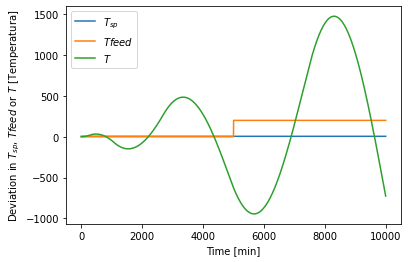

In [ ]:
plt.plot(ts, simulation_results['Tsp'], ts, simulation_results['Tfeed'], ts, simulation_results['T'])
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $T_{sp}$, $Tfeed$ or $T$ [Temperatura]')
plt.legend(['$T_{sp}$', '$Tfeed$', '$T$'])

Analisando o gráfico acima, pode-se observar que o controle nesse sistema, com o tau estabelecido, não estabiliza o sistema, ou seja não o controla. Nota-se que após aplicação da perturbação do tipo degrau na variável $T_feed$, o sistema que já não era estável, torna-se ainda mais oscilatório. Dessa forma, a temperatura que deveria ser controlada aumenta a instabilidade do processo.

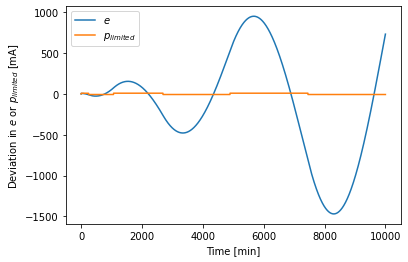

In [ ]:
plt.plot(ts, simulation_results['e'], ts, simulation_results['plimited'])
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $e$ or $p_{limited}$ [mA]')
plt.legend(['$e$', '$p_{limited}$'])

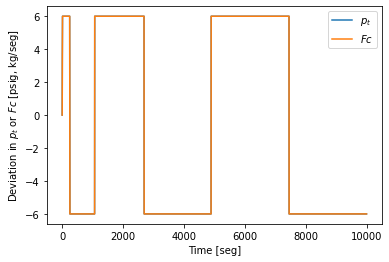

In [ ]:
plt.plot(ts, simulation_results['pt'], ts, simulation_results['Fc'])
plt.xlabel('Time [seg]')
plt.ylabel('Deviation in $p_t$ or $Fc$ [psig, kg/seg]')
plt.legend(['$p_t$', '$Fc$'])

ValueError: ignored

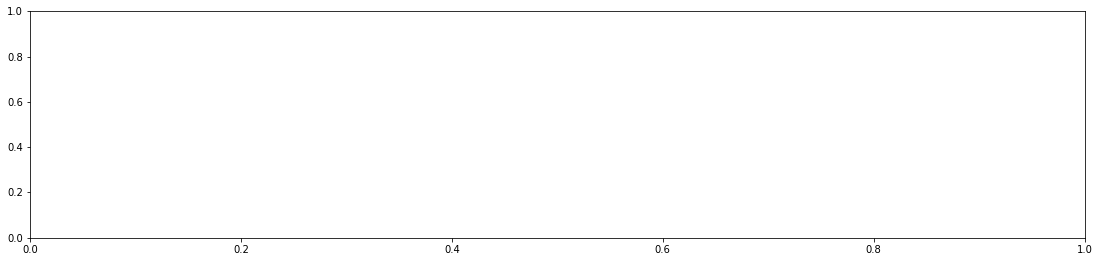

In [ ]:
#Função para calcular os critérios de integral de erro
def error_integral_criteria(C, R, T, crit):
  dt = T[1]-T[0]
  if crit == 'IAE':
    return sum(np.abs(R-C)*dt)
  if crit == 'ITAE':
    return sum(np.abs(R-C)*T)
  if crit == 'ISE':
    return sum((R-C)**2*dt)
  if crit == 'ITSE':
    return sum((R-C)**2*T)

#Definindo K_m
K_m = 1 #ganho Gm

#Definindo G_c
G_c = 1 #Gc sintonizado

#Definindo G_a
G_a = 11.6/(3600*(20-4)) #Ga

# Define G_p
G_p = 1 #Gp real

# Define G_L
G_L = 1 #GL

# Define G_m
G_m = 1 #Gm

#Define G_PRC (process reaction curve transfer function)
#G_PRC = G_a*G_p*G_m

#Define G_SCR (closed-loop servo control response transfer function)
#G_SCR = K_m*G_c*G_a*G_p/(1 + G_c*G_PRC)

#Define G_RCR (closed-loop regulatory control response transfer function)
#G_RCR = G_L/(1 + G_c*G_PRC) 

# Simulate the servo control closed-loop response
T0 = 0
T1 = 60
nt = 1000 #número de pontos na simulação
T = np.linspace(T0, T1, nt)
R = np.ones(nt) # unit step on R

#T, C = ct.step_response(G_SCR, T)

plt.close ('all')
fig_width_cm = 24*2
fig_height_cm = 18*2
plt.figure(1, figsize=(fig_width_cm /2.54 , fig_height_cm /2.54))

plt.subplot(3, 1, 1)
plt.plot(T, C, 'b-')
plt.plot(T, R, 'r-.')
plt.ylabel('C or R [-]') # change this according your model
plt.xlabel('t [-]') # change this according your model
plt.grid()
plt.legend(labels =('C','R')) # change this according your model

print('Error-integral criteria for servo control:\n')
for crit in ['IAE', 'ITAE', 'ISE', 'ITSE']:
  print('   {0} = {1}\n'.format(crit, error_integral_criteria(C, R, T, crit)))

# Simulate the regulatory control closed-loop response
#T, yout = ct.step_response(G_RCR, T)
#L = np.ones(nt) # unit step on L
#R = 0*R # regulatory control means R = 0

plt.subplot(3, 1, 2)
plt.plot(T, C, 'b-')
plt.plot(T, R, 'r-.')
plt.ylabel('C or R [-]') # change this according your model
plt.xlabel('t [-]') # change this according your model
plt.grid()
plt.legend(labels =('C','R')) # change this according your model

print('Error-integral criteria for regulatory control:\n')
for crit in ['IAE', 'ITAE', 'ISE', 'ITSE']:
  print('   {0} = {1}\n'.format(crit, error_integral_criteria(C, R, T, crit)))

Considerando que um controlador que satisfaz um controle servo pode não satisfazer um controle regulatório, avalia-se o erro integral para cada controle. Porém, como a função de transferência $G_L$ possui as mesmas raízes para diferentes valores de $\tau$ não houve mudança do erro integral do controle servo e regulatório.